# 데이터 불러오기

In [116]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install koreanize-matplotlib
import koreanize_matplotlib

In [118]:
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [119]:
dlq = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_A_DLQ.csv')             # 연체정보(금융회사, 대부회사)
pub = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_A_PUB.csv')             # 연체정보(공공기관)

ln = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_P_LN.csv')               # 개인대출정보(금융권)
ln_sp = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_P_LN_SP.csv')         # 개인대출정보(대부업권)

cd_opn = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_P_CD_OPN.csv')       # 카드개설정보
cd_usg = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_P_CD_USG.csv')       # 카드이용정보

grnt = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_P_GRNT.csv')           # 채무보증정보

In [120]:
id = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_A_ID.csv')                   # 차주정보

rlps = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_CT_RLPS.csv')            # 보험계약관계자정보
cont = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_CT_CONT_PVT.csv')        # 보험계약정보
mgg = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_CT_MGG_PVT.csv')          # 보험담보정보

accd = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_PT_ACCD.csv')            # 청구사고정보
claim_cont = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_PT_CONT.csv')      # 청구계약정보
pmnt = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_PT_PMNT.csv')            # 청구지급사유정보
pmntdtl = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_PT_PMNTDTL.csv')      # 청구지급상세사유정보
vctm = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_I_PT_VCTM.csv')            # 청구피해자물정보

In [121]:
desc = pd.read_csv('/content/drive/MyDrive/최종프로젝트/SDB2_A_DESC.csv')                   # 기업정보

# EDA

## 1.청구사고정보

* 보험계약 테이블과 청구사고 테이블 묶기 위해 차주일련번호만 사용
* 'ACCD_SN', 'REQ_SN' 쌍으로 차주 고유값이 중복되는 데이터는 없음

In [122]:
accd

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,ACCD_SN,REQ_SN,IS_INDIV,GIS_CD,ACCD_DT,FST_RPT_DT,ACCD_GIS_CD,IN_DRV_RLTN_CD
0,514694,1,8,5561038,0,2292889,839524,1,99,201905,201905,99,0
1,1666172,1,8,1604841,0,598965,1898453,1,36,201902,201905,99,0
2,67340,1,6,5144128,0,797919,672190,1,23,202006,202006,23,99
3,1790965,1,3,8278365,0,1132823,1609635,1,38,201904,201904,99,0
4,980616,1,6,8670561,0,673077,566526,1,11,201911,202003,99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41342,470724,1,8,275275,0,1252459,1431063,1,25,201901,201906,99,0
41343,81437,1,6,8020811,0,2130087,1794822,1,33,202001,202001,99,0
41344,689368,1,6,6513234,0,376683,547171,1,99,201806,201807,99,0
41345,263114,1,3,1108441,0,76699,672689,1,39,201909,202003,99,0


In [123]:
# 개인만 사용
p_accd = accd[accd['JOIN_SN_TYP'] == 1]

In [124]:
accd.agg(['count', 'size', 'nunique'])

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,ACCD_SN,REQ_SN,IS_INDIV,GIS_CD,ACCD_DT,FST_RPT_DT,ACCD_GIS_CD,IN_DRV_RLTN_CD
count,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347
size,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347
nunique,17591,1,3,22189,1,39650,33603,1,17,25,25,17,6


In [125]:
p_accd.agg(['count', 'size', 'nunique'])

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,ACCD_SN,REQ_SN,IS_INDIV,GIS_CD,ACCD_DT,FST_RPT_DT,ACCD_GIS_CD,IN_DRV_RLTN_CD
count,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347
size,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347
nunique,17591,1,3,22189,1,39650,33603,1,17,25,25,17,6


In [126]:
dupl_accd = p_accd[p_accd.duplicated(subset=['ACCD_SN', 'REQ_SN'], keep=False)].sort_values(by='ACCD_SN')
dupl_accd

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,ACCD_SN,REQ_SN,IS_INDIV,GIS_CD,ACCD_DT,FST_RPT_DT,ACCD_GIS_CD,IN_DRV_RLTN_CD


## 2.청구지급사유정보

* 청구사고정보 테이블과 사고번호+청구번호가 일치하면 청구사유정보 테이블에서 차주일련번호 가져오기
* 청구지급상세사유정보에는 없는 보험종류코드 외에 다른 필요한 데이터는 청구지급상세사유정보에 다 있음
* 청구사고 관련 테이블들은 청구지급사유상세정보를 주로 처리해야 할 듯

In [127]:
pmnt

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,INS_GBN_CD,VCTM_SN,PMNT_RESN_CD,PMNT_DT,IS_PMNT_INVST,PMNT_JDGMNT_CD
0,1433170,1818958,6,9641244,4,2547,B2005,202005,0,1
1,797449,671787,6,5047760,17,260,C1008,201808,1,11
2,2715,1162881,6,8072495,17,3152,C1008,201901,1,11
3,1733094,182346,8,6628089,16,2947,B2002,202002,0,1
4,681773,524001,8,9746704,1,652,B2002,201912,0,1
...,...,...,...,...,...,...,...,...,...,...
67794,302072,1756207,6,7106786,4,23,B2002,201904,0,1
67795,144869,122001,6,3737241,4,2199,A9999,201808,0,3
67796,1029524,867235,6,8830641,3,1930,B2002,201901,0,1
67797,1189558,592357,8,7362949,3,2947,A1009,201905,0,1


In [128]:
pmnt.agg(['count', 'size', 'nunique'])

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,INS_GBN_CD,VCTM_SN,PMNT_RESN_CD,PMNT_DT,IS_PMNT_INVST,PMNT_JDGMNT_CD
count,67799,67799,67799,67799,67799,67799,67799,67799,67799,67799
size,67799,67799,67799,67799,67799,67799,67799,67799,67799,67799
nunique,38742,32798,3,25277,19,368,50,25,2,8


In [129]:
pmnt_merge = pd.merge(pmnt, p_accd[['JOIN_SN', 'ACCD_SN', 'REQ_SN']], on=['ACCD_SN', 'REQ_SN'], how='inner')
pmnt_merge

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,INS_GBN_CD,VCTM_SN,PMNT_RESN_CD,PMNT_DT,IS_PMNT_INVST,PMNT_JDGMNT_CD,JOIN_SN
0,1433170,1818958,6,9641244,4,2547,B2005,202005,0,1,943833
1,1433170,1818958,6,9641244,4,2547,A1006,202005,0,1,943833
2,797449,671787,6,5047760,17,260,C1008,201808,1,11,1941009
3,797449,671787,6,5047760,17,2456,C1009,201807,1,13,1941009
4,2715,1162881,6,8072495,17,3152,C1008,201901,1,11,503856
...,...,...,...,...,...,...,...,...,...,...,...
67792,2265910,955442,6,1558111,4,1476,B2002,201901,0,1,439991
67793,1188714,1001209,6,6886821,17,1932,C1008,201807,1,11,365091
67794,2218121,1127169,8,7431894,3,652,B2005,201905,0,1,477072
67795,1189558,592357,8,7362949,3,2947,A1009,201905,0,1,1537577


In [130]:
pmnt_merge.agg(['count', 'size', 'nunique'])

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,INS_GBN_CD,VCTM_SN,PMNT_RESN_CD,PMNT_DT,IS_PMNT_INVST,PMNT_JDGMNT_CD,JOIN_SN
count,67797,67797,67797,67797,67797,67797,67797,67797,67797,67797,67797
size,67797,67797,67797,67797,67797,67797,67797,67797,67797,67797,67797
nunique,38742,32798,3,25276,19,368,50,25,2,8,17230


In [131]:
pmnt_group = pmnt_merge.groupby(['POL_SN'])['ACCD_SN'].nunique().reset_index()
pmnt_group

,POL_SN,ACCD_SN
0,344,1
1,928,1
2,1092,1
3,1308,2
4,1616,6
...,...,...
25271,9994312,3
25272,9994891,1
25273,9995087,5
25274,9995671,5


In [132]:
pmnt_group1 = pmnt_merge.groupby(['PMNT_RESN_CD','PMNT_JDGMNT_CD']).size().reset_index(name='counts')

In [133]:
pmnt_group0 = pmnt_merge.groupby(['PMNT_RESN_CD']).size().reset_index(name='counts')

<ipython-input-134-488656dd7505>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PMNT_RESN_CD', y='counts', data=pmnt_group0, palette='pastel')


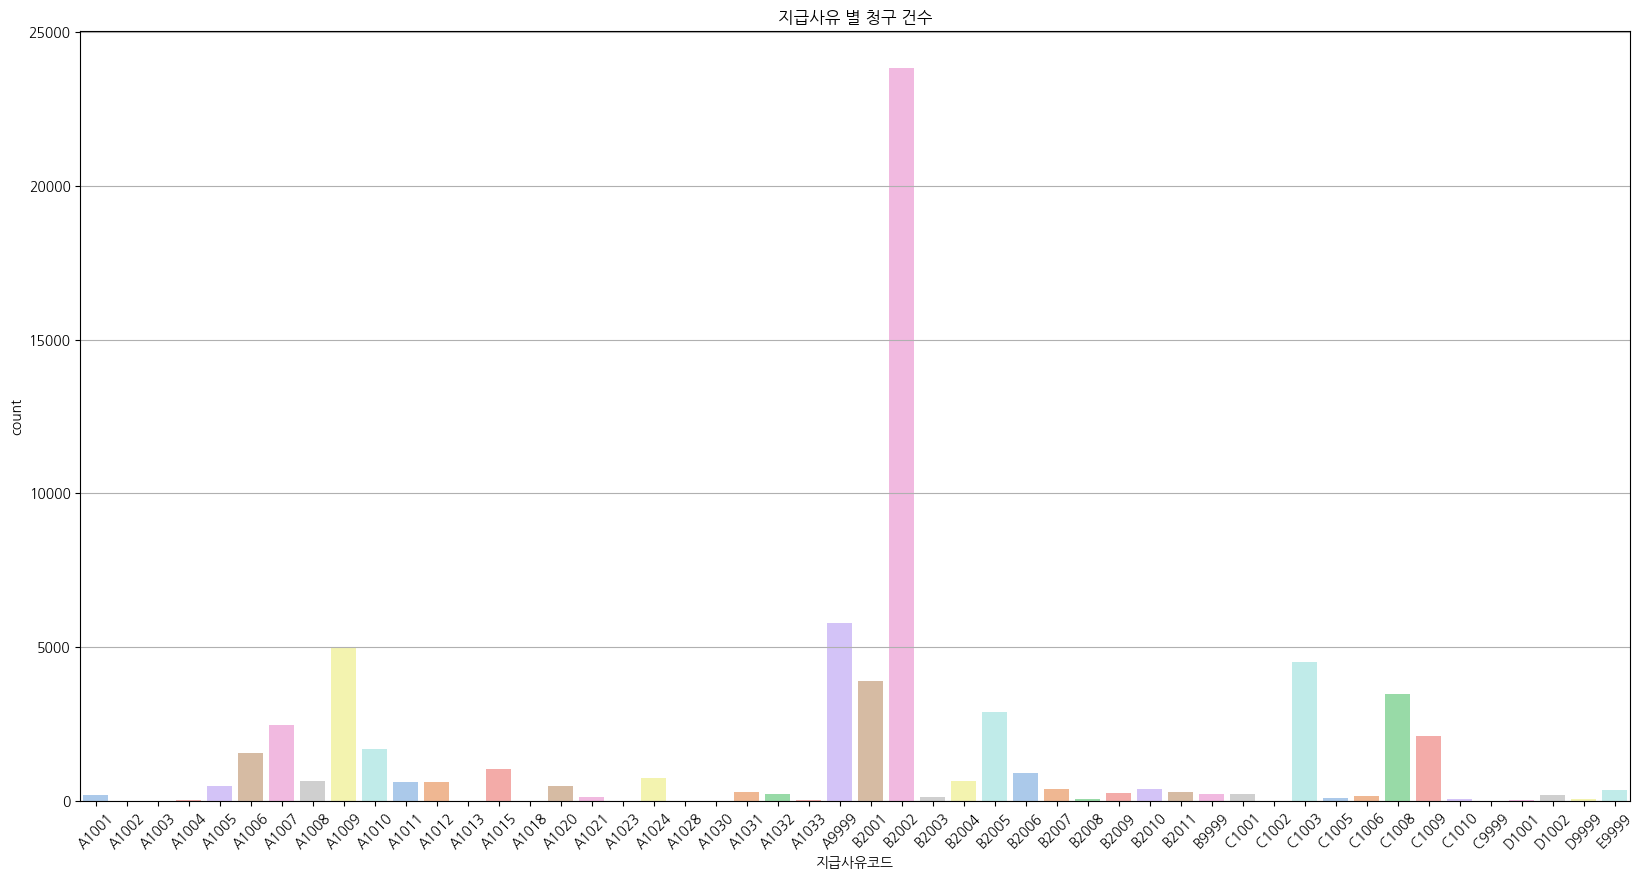

In [134]:
plt.figure(figsize=(20,10))
sns.barplot(x='PMNT_RESN_CD', y='counts', data=pmnt_group0, palette='pastel')
plt.title('지급사유 별 청구 건수')
plt.xlabel('지급사유코드')
plt.ylabel('count')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

* B2002 : 질병통원의료비(실손) 이 압도적
* A9999 : 기타 인보험(정액) 담보
* A1009 : 질병입원(정액)
* C1003 : 대인배상1+2
* B2001 : 질병입원의료비(실손)
* C1008 : 대물배상
* B2005 : 상해통원의료비(실손)

=> 인적 보상이 청구 건수가 많음(당연한 소리?), 상해보단 질병에 대한 청구 건이 많음


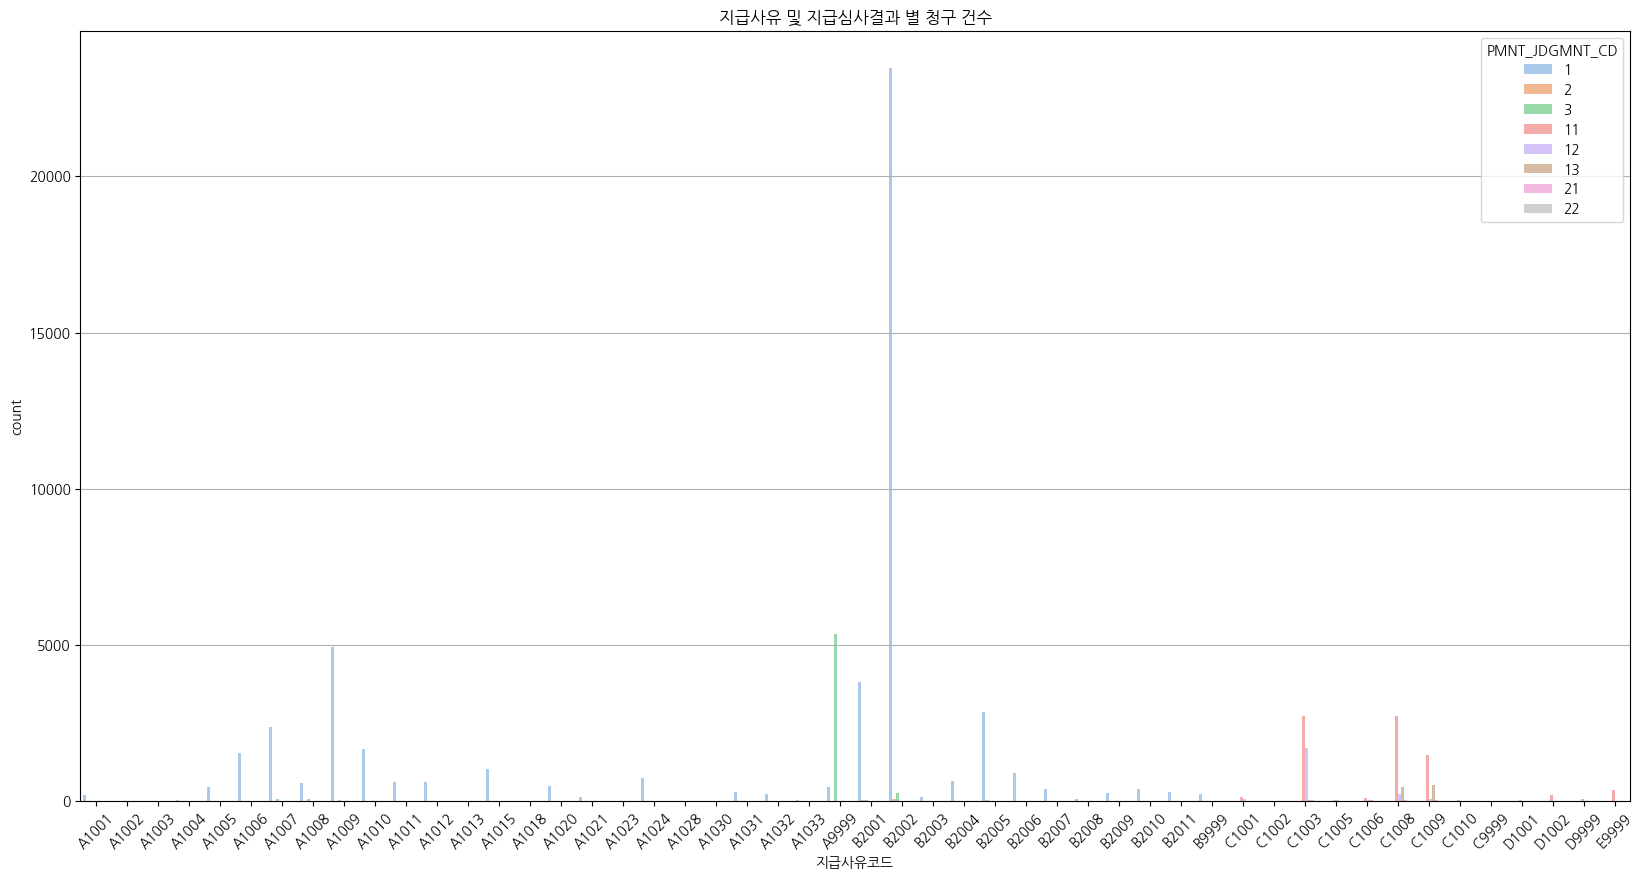

In [135]:
plt.figure(figsize=(20,10))
sns.barplot(x='PMNT_RESN_CD', y='counts', hue='PMNT_JDGMNT_CD', data=pmnt_group1, palette='pastel')
plt.title('지급사유 및 지급심사결과 별 청구 건수')
plt.xlabel('지급사유코드')
plt.ylabel('count')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

* 인적 보상 청구에 대한 항목들은 대체로 지급되는 건이 많으나, A9999 기타 인보험(정액) 담보에 대해서는 부지급이 많음(지급X)
* 자동차사고(C1001~1009)는 지급/부지급이 아닌 종결/미결로 구분되어 있어 이 자료만 가지고는 지급여부를 판단하기 어려움

<ipython-input-136-f538cf6e114f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PMNT_JDGMNT_CD', y='counts', data=pmnt_group2, palette='pastel')


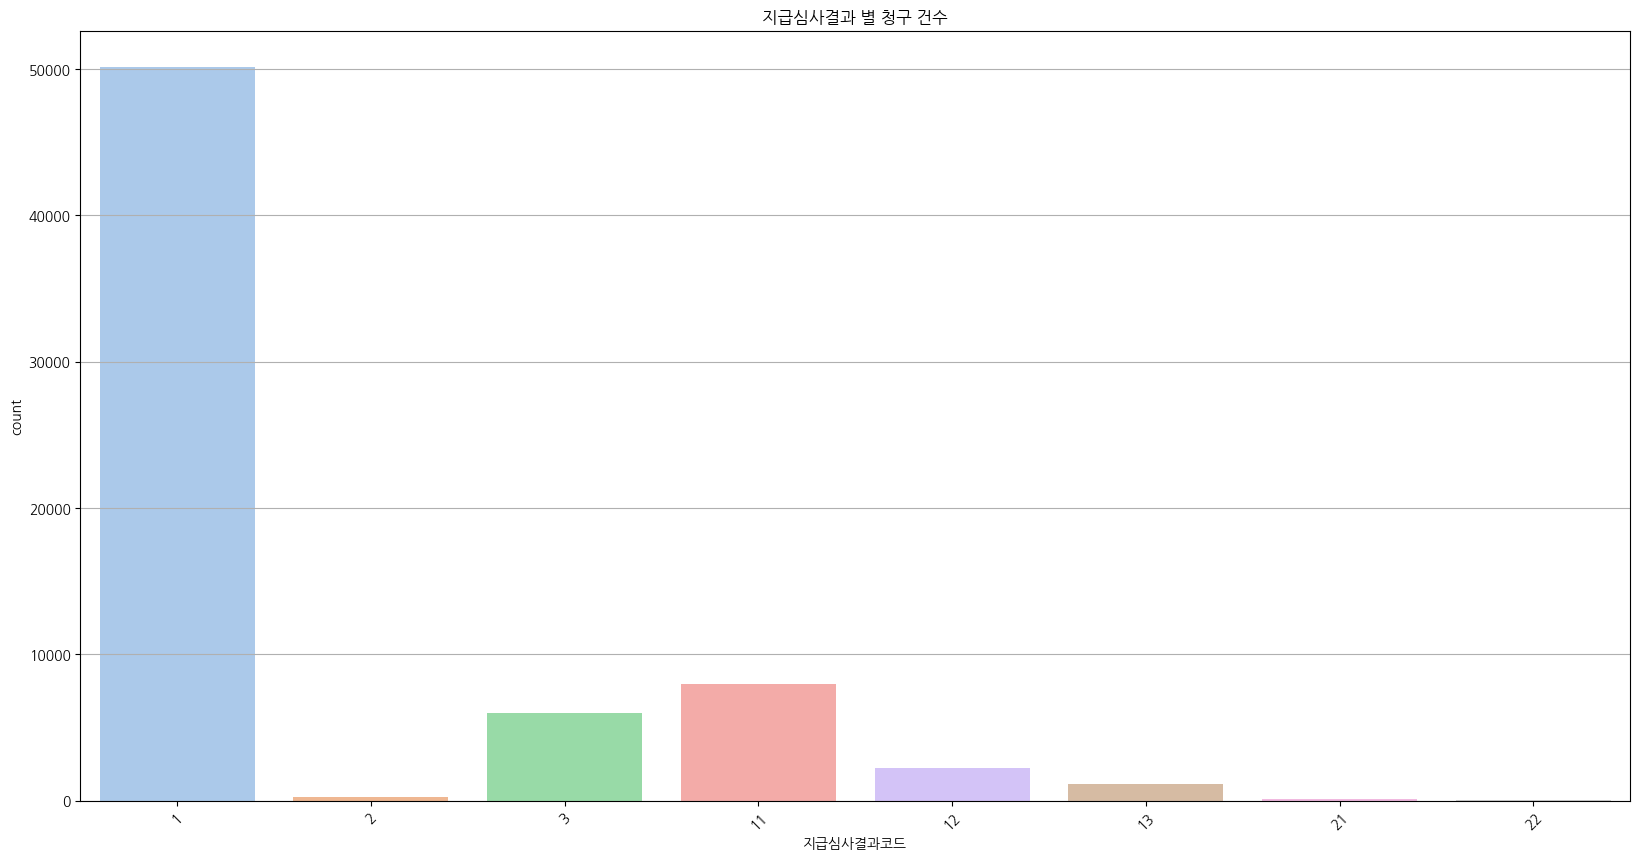

In [136]:
pmnt_group2 = pmnt_merge.groupby(['PMNT_JDGMNT_CD']).size().reset_index(name='counts')

plt.figure(figsize=(20,10))
sns.barplot(x='PMNT_JDGMNT_CD', y='counts', data=pmnt_group2, palette='pastel')
plt.title('지급심사결과 별 청구 건수')
plt.xlabel('지급심사결과코드')
plt.ylabel('count')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

* 지급으로 심사된 경우가 대다수

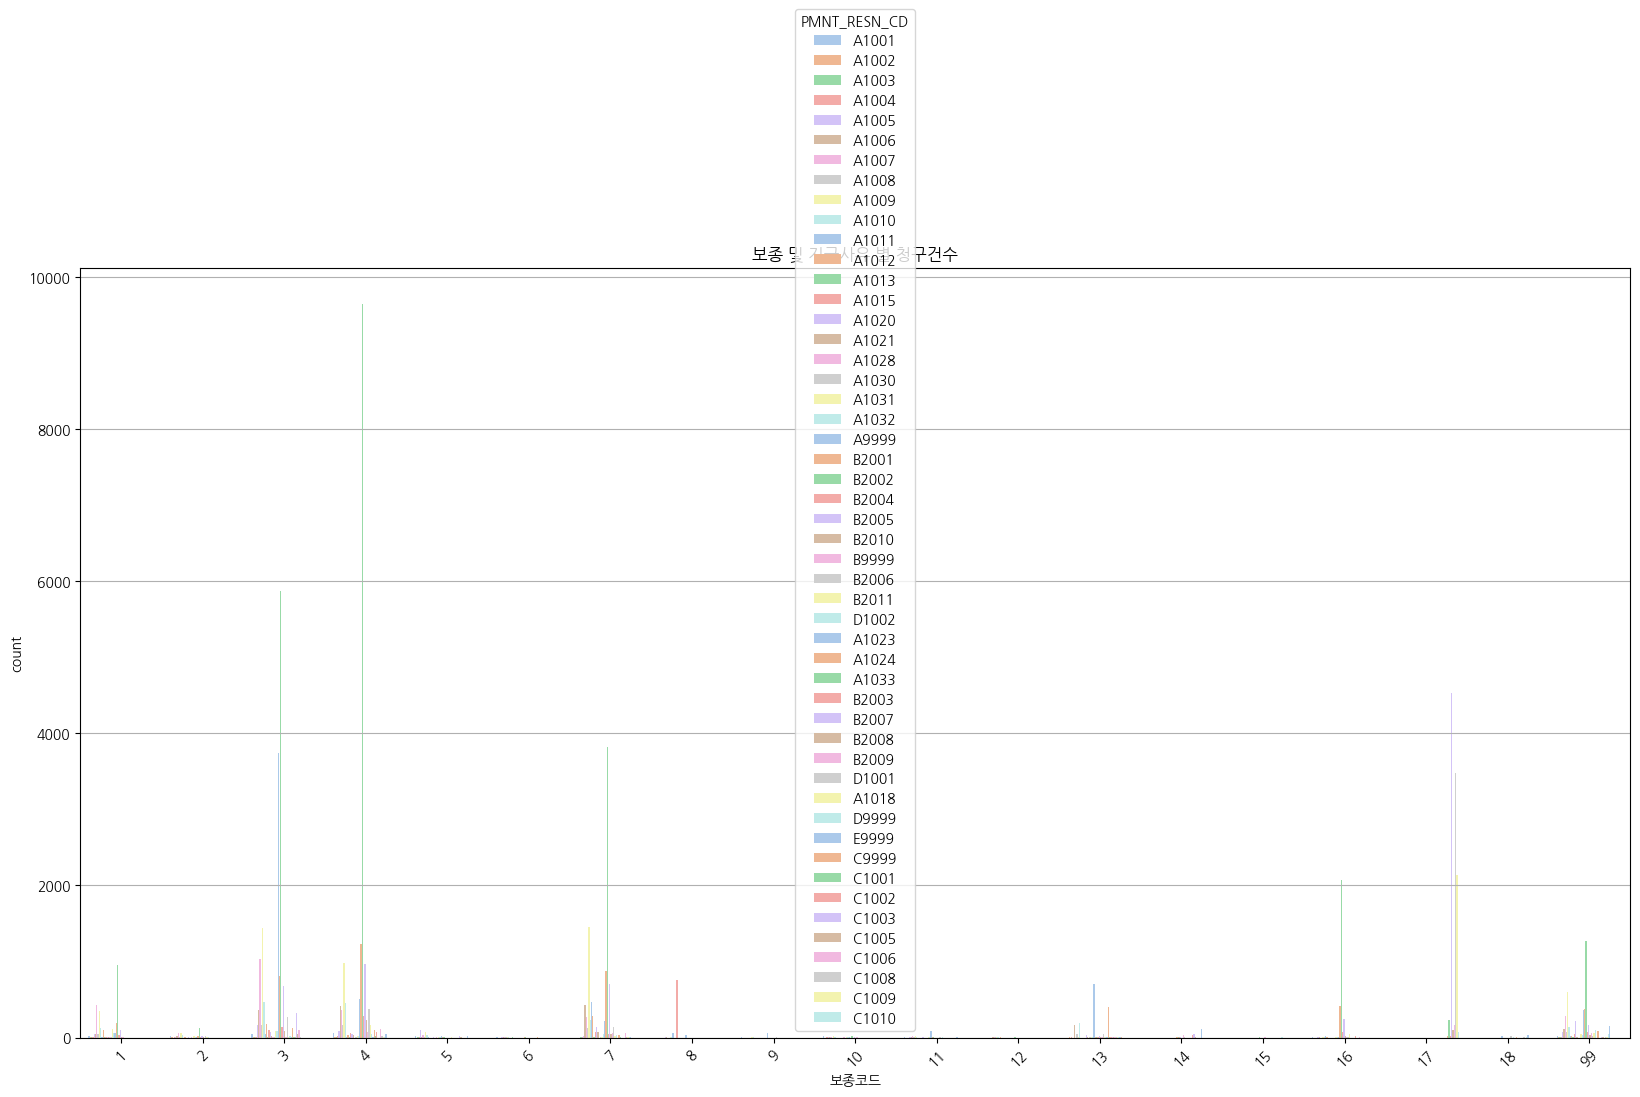

In [137]:
pmnt_group3 = pmnt_merge.groupby(['INS_GBN_CD', 'PMNT_RESN_CD']).size().reset_index(name='counts')

plt.figure(figsize=(20,10))
sns.barplot(x='INS_GBN_CD', y='counts', hue='PMNT_RESN_CD', data=pmnt_group3, palette='pastel')
plt.title('보종 및 지급사유 별 청구건수')
plt.xlabel('보종코드')
plt.ylabel('count')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

<ipython-input-138-e2f813a04b38>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='INS_GBN_CD', y='counts', data=pmnt_group4, palette='pastel')


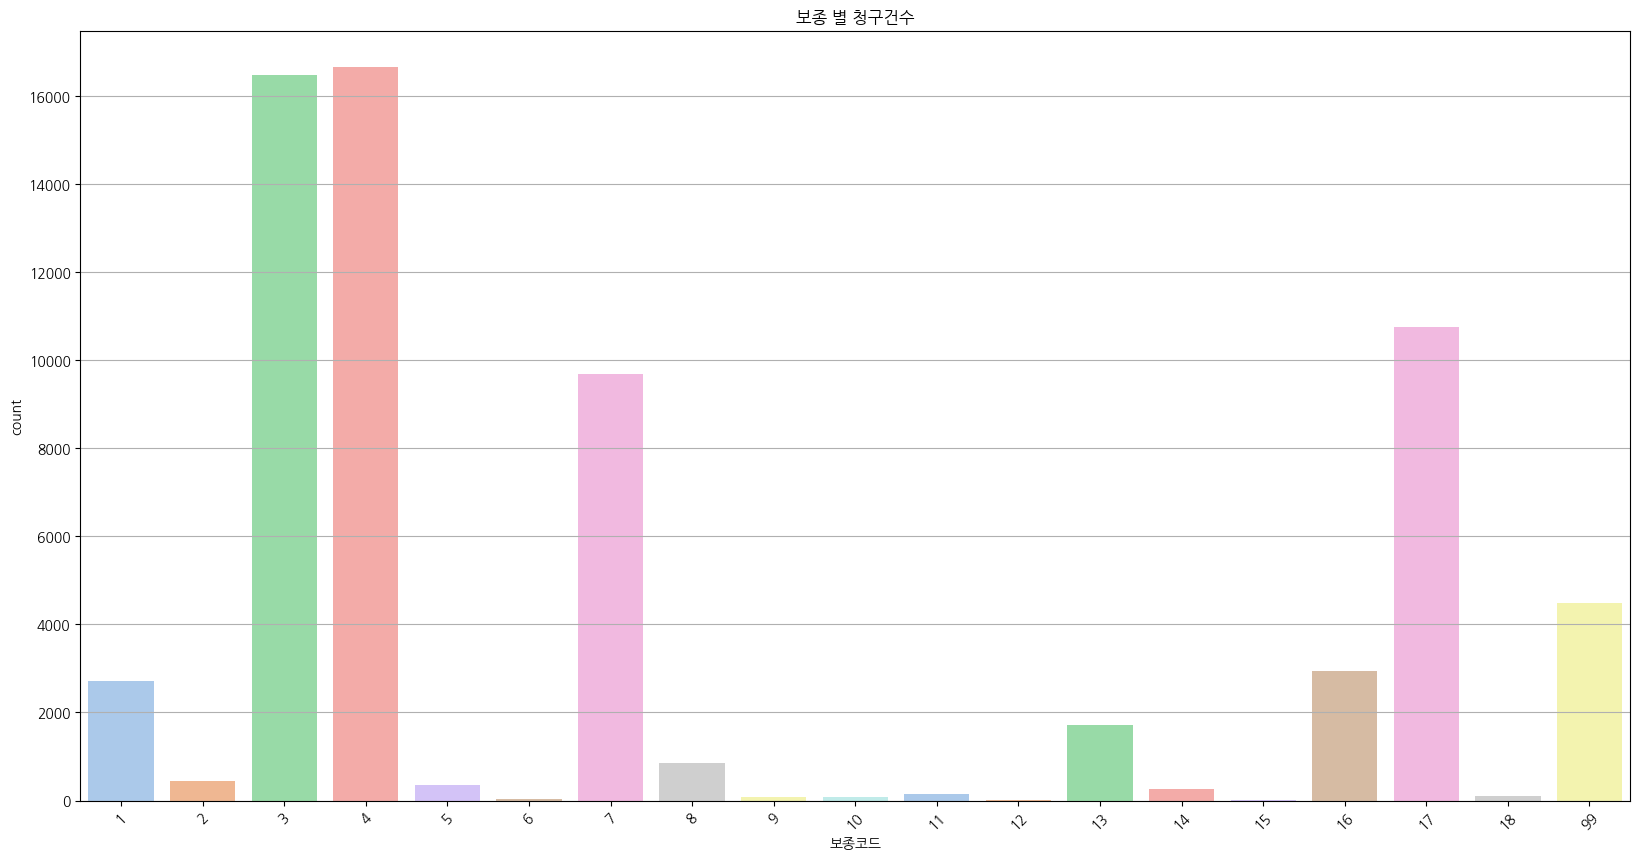

In [138]:
pmnt_group4 = pmnt_merge.groupby(['INS_GBN_CD']).size().reset_index(name='counts')

plt.figure(figsize=(20,10))
sns.barplot(x='INS_GBN_CD', y='counts', data=pmnt_group4, palette='pastel')
plt.title('보종 별 청구건수')
plt.xlabel('보종코드')
plt.ylabel('count')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

* 질병(건강)보험, 상해보험이 압도적
  * 청구 건수는 질병 관련이 가장 많았는데 보종으로는 왜 상해보험도 건수가 많은지?

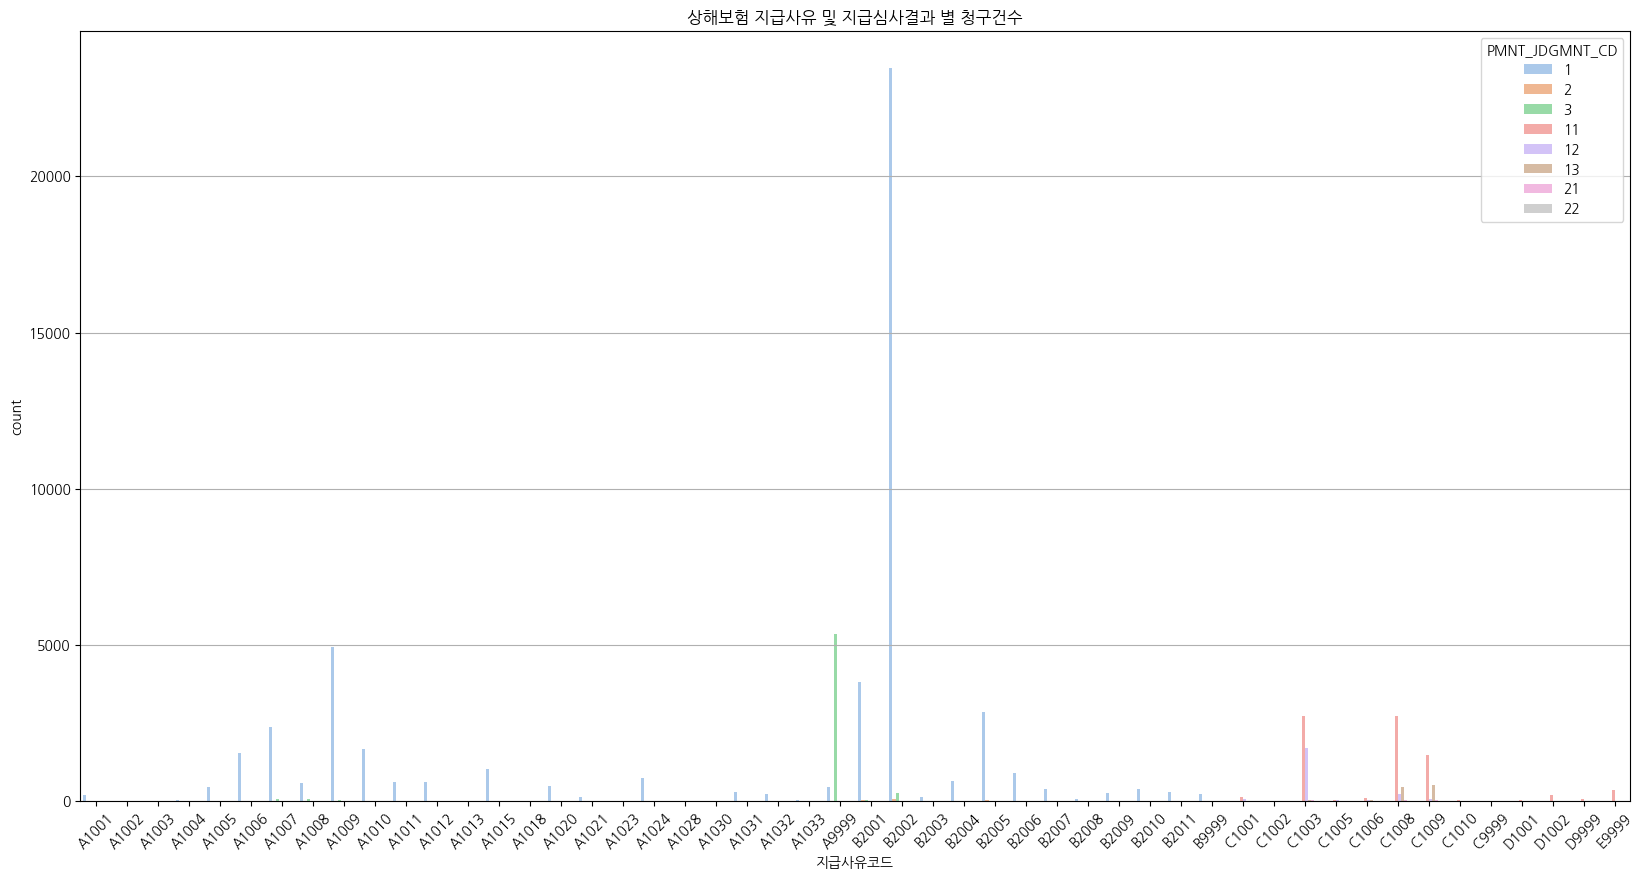

In [142]:
accident = pmnt[pmnt['INS_GBN_CD'] == 4]
accident2 = pmnt_merge.groupby(['PMNT_RESN_CD','PMNT_JDGMNT_CD']).size().reset_index(name='counts')

plt.figure(figsize=(20,10))
sns.barplot(x='PMNT_RESN_CD', y='counts', hue='PMNT_JDGMNT_CD', data=accident2, palette='pastel')
plt.title('상해보험 지급사유 및 지급심사결과 별 청구건수')
plt.xlabel('지급사유코드')
plt.ylabel('count')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

* 상해보험인데 B2002(질병실손)가 가장 많음...?
* 질병상해보험이라고해서 질병+상해를 보장하는 보험도 있음
* 상해로 인해 유발된 질병으로 사망했을 시, 상해보험에서 사망보험금을 지급하라고 판결이 내려진 판례도 있음
* 질병이라고 하더라도 급격성과 우연성의 요건을 갖추면 상해사고로 볼 수 있다는 판례 있음

In [ ]:
pmnt_merge[(pmnt_merge['ACCD_SN'] == 797449) & (pmnt_merge['REQ_SN'] == 671787)]

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,INS_GBN_CD,VCTM_SN,PMNT_RESN_CD,PMNT_DT,IS_PMNT_INVST,PMNT_JDGMNT_CD,JOIN_SN
2,797449,671787,6,5047760,17,260,C1008,201808,1,11,1941009
3,797449,671787,6,5047760,17,2456,C1009,201807,1,13,1941009


In [ ]:
pmnt_merge[(pmnt_merge['ACCD_SN'] == 273316) & (pmnt_merge['REQ_SN'] == 229516)]

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,INS_GBN_CD,VCTM_SN,PMNT_RESN_CD,PMNT_DT,IS_PMNT_INVST,PMNT_JDGMNT_CD,JOIN_SN
1581,273316,229516,6,1679814,17,1958,C1008,201807,1,13,1628751


## 3.청구지급사유상세정보

1. 지급사유코드 말고 지급상세사유코드만 사용은 어떨지?
2. VCTM_SN(피해자물일련번호) : 삭제
3. 보험금 지급 금액이 0이면 청구 건수에서 삭제
4. 보험금 지급 금액이 음수이면 환수 건으로, 총 보험금 지급 금액에는 합산하고 청구 건수에서는 삭제하는게 타당해보임


In [ ]:
pmntdtl

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT
0,1132050,953774,8,8482978,1172,A1001,201809,1,1,10000
1,2141286,76910,6,3612735,23,B2001,202001,1,1,9400
2,1493931,1258813,6,9435298,2857,C1003,202003,12,1,600
3,122531,103007,6,7984136,665,B2001,202002,1,1,1300
4,1740460,1466487,6,3332223,3298,B2002,201909,1,1,200
...,...,...,...,...,...,...,...,...,...,...
71244,385388,324468,6,7894826,665,B2002,201910,1,1,170
71245,1410627,1754272,6,6915229,2547,B2002,201811,1,1,11
71246,430262,619986,6,7199202,2547,B2002,201809,1,1,78
71247,2253620,669803,6,5925060,2547,B2001,201807,1,1,1200


In [ ]:
pmntdtl.agg(['count', 'size', 'nunique'])

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT
count,71249,71249,71249,71249,71249,71249,71249,71249,71249,71249
size,71249,71249,71249,71249,71249,71249,71249,71249,71249,71249
nunique,37890,31945,3,24719,356,50,25,12,13,273


In [ ]:
pmntdtl_merge = pd.merge(pmntdtl, p_accd[['JOIN_SN', 'ACCD_SN', 'REQ_SN']], on=['ACCD_SN', 'REQ_SN'], how='inner')
pmntdtl_merge

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT,JOIN_SN
0,1132050,953774,8,8482978,1172,A1001,201809,1,1,10000,1940888
1,2141286,76910,6,3612735,23,B2001,202001,1,1,9400,290246
2,2141286,76910,6,3612735,23,B2002,202001,1,1,280,290246
3,1493931,1258813,6,9435298,2857,C1003,202003,12,1,600,170197
4,1493931,1258813,6,9435298,260,C1008,202003,15,1,690,170197
...,...,...,...,...,...,...,...,...,...,...,...
71242,1733901,547171,6,8533941,2001,B2002,201905,1,1,90,154209
71243,2242016,955442,6,665213,1476,B2002,201901,1,1,19,868692
71244,1506436,1269337,6,9513702,2199,B2002,202001,1,1,17,284761
71245,430262,619986,6,7199202,2547,B2002,201809,1,1,78,143063


In [ ]:
pmntdtl_merge.agg(['count', 'size', 'nunique'])

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT,JOIN_SN
count,71247,71247,71247,71247,71247,71247,71247,71247,71247,71247,71247
size,71247,71247,71247,71247,71247,71247,71247,71247,71247,71247,71247
nunique,37889,31945,3,24718,356,50,25,12,13,273,16965


In [ ]:
dupl_pmntdtl1 = pmntdtl[pmntdtl.duplicated(subset=['POL_SN'], keep=False)].sort_values(by='POL_SN')
dupl_pmntdtl1

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT
18593,562305,473114,6,928,2059,C1009,201909,14,1,510
66455,562305,473114,6,928,2059,C1009,201909,14,3,1500
43208,562305,473114,6,928,2059,C1009,201909,14,2,520
8141,1016428,1164318,6,1308,23,B2005,201912,1,1,18
40272,1723970,358795,6,1308,23,B2002,201912,1,1,16
...,...,...,...,...,...,...,...,...,...,...
10049,1493448,547171,6,9995671,2001,B2002,201808,1,1,250
21566,1493448,1337217,6,9995671,2001,B2002,201912,1,1,65
29662,2024792,547171,6,9995671,2001,B2002,202006,1,1,65
44821,1205868,1337217,6,9995671,2001,B2002,201912,1,1,38


In [ ]:
dupl_pmntdtl2 = pmntdtl[pmntdtl.duplicated(subset=['ACCD_SN', 'REQ_SN'], keep=False)].sort_values(by='ACCD_SN')
dupl_pmntdtl2

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT
50527,32,1602585,6,2224046,2547,A1020,201907,1,1,39
67265,32,1602585,6,2224046,2547,B2005,201907,1,1,76
32340,58,42,6,6438304,2040,B2002,202005,1,1,58
29344,58,42,6,6438304,2040,B2002,202005,1,1,120
8454,362,955442,6,2650623,1476,B2001,201902,1,1,100
...,...,...,...,...,...,...,...,...,...,...
51606,2302099,1939578,6,4383405,2199,B2007,202001,1,1,35
8503,2302211,679643,6,4722373,23,A1009,201806,1,1,65
3908,2302211,679643,6,4722373,23,B2001,201806,1,1,380
29787,2302234,1939682,6,5841131,2199,B2001,201903,1,1,89


<ipython-input-54-a929175b78ba>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PMNT_RESN_DTL_CD', y='PMNT_RESN_CD', data=pmntdtl_group1, palette='pastel')


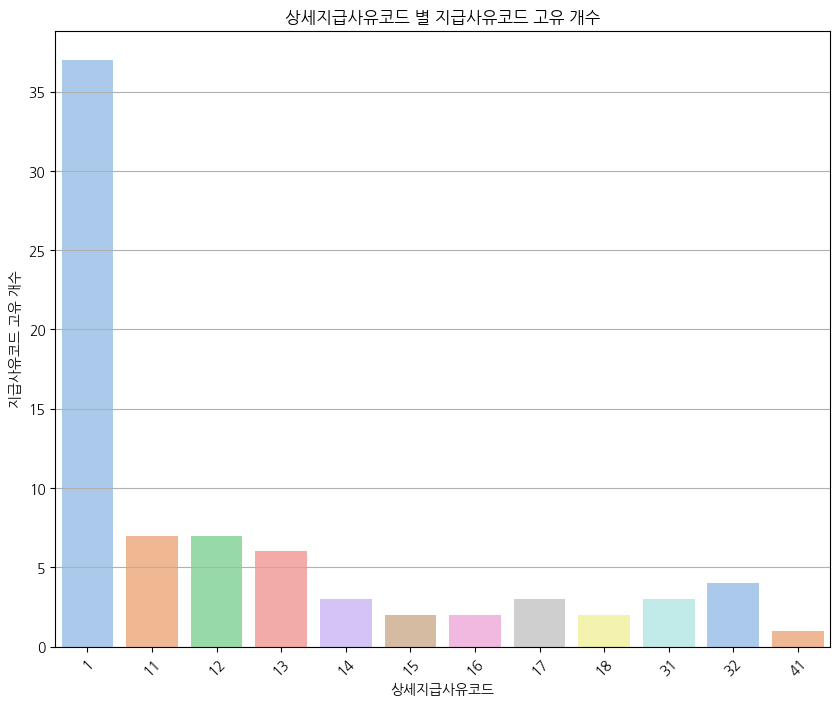

In [ ]:
pmntdtl_group1 = pmntdtl_merge.groupby(['PMNT_RESN_DTL_CD'])['PMNT_RESN_CD'].nunique().reset_index()

plt.figure(figsize=(10,8))
sns.barplot(x='PMNT_RESN_DTL_CD', y='PMNT_RESN_CD', data=pmntdtl_group1, palette='pastel')
plt.title('상세지급사유코드 별 지급사유코드 고유 개수')
plt.xlabel('상세지급사유코드')
plt.ylabel('지급사유코드 고유 개수')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

* 상세지급사유코드 1에 해당하는 지급사유코드 37개 : 피벗테이블로 확인하는게 좋을 듯

In [ ]:
pmntdtl_group1

,PMNT_RESN_DTL_CD,PMNT_RESN_CD
0,1,37
1,11,7
2,12,7
3,13,6
4,14,3
5,15,2
6,16,2
7,17,3
8,18,2
9,31,3


In [ ]:
for i, j in uniq.items():
  print('상세지급사유코드 ', str(i), ': ', ', '.join(j) )

상세지급사유코드  1 :  A1001, B2001, B2002, A1009, B2005, B9999, A9999, B2004, B2006, A1010, A1007, A1012, A1024, A1008, A1006, A1005, B2007, A1020, B2009, B2010, B2011, A1013, A1004, A1015, A1032, A1021, A1011, B2003, A1031, B2008, A1018, A1033, A1002, A1030, A1023, A1003, A1028
상세지급사유코드  11 :  C1003, C1006, C1005, C1001, C1010, C1002, C9999
상세지급사유코드  12 :  C1003, C1006, C1001, C1010, C1005, C1002, C9999
상세지급사유코드  13 :  C1003, C1001, C1005, C1010, C1006, C9999
상세지급사유코드  14 :  C1008, C1009, C1010
상세지급사유코드  15 :  C1008, C1009
상세지급사유코드  16 :  C1008, C1009
상세지급사유코드  17 :  C1008, C1010, C1009
상세지급사유코드  18 :  C1008, C1009
상세지급사유코드  31 :  D1001, D1002, D9999
상세지급사유코드  32 :  D1001, D1002, D9999, C9999
상세지급사유코드  41 :  E9999


In [ ]:
pmntcd = pmntdtl_merge[['PMNT_RESN_DTL_CD', 'PMNT_RESN_CD']]

pivot_dtl1 = pmntcd.pivot_table(index='PMNT_RESN_DTL_CD', columns='PMNT_RESN_CD', aggfunc='size', fill_value=0)
pivot_dtl1

PMNT_RESN_CD,A1001,A1002,A1003,A1004,A1005,A1006,A1007,A1008,A1009,A1010,A1011,A1012,A1013,A1015,A1018,A1020,A1021,A1023,A1024,A1028,A1030,A1031,A1032,A1033,A9999,B2001,B2002,B2003,B2004,B2005,B2006,B2007,B2008,B2009,B2010,B2011,B9999,C1001,C1002,C1003,C1005,C1006,C1008,C1009,C1010,C9999,D1001,D1002,D9999,E9999
PMNT_RESN_DTL_CD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,202,14,22,52,490,1539,2519,646,5035,1685,643,627,18,1051,19,502,129,14,717,9,21,304,244,30,5650,3950,23912,140,672,2889,897,380,58,265,399,301,253,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,126,20,3047,56,81,0,0,31,11,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,3,1358,8,56,0,0,14,8,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,308,14,6,0,0,7,1,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3029,1834,3,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,439,63,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,470,1,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,525,1,1,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1864,795,0,0,0,0,0,0


In [ ]:
pmntcd = pmntdtl_merge[['PMNT_RESN_DTL_CD', 'PMNT_RESN_CD']]

pivot_dtl2 = pmntcd.pivot_table(index='PMNT_RESN_DTL_CD', columns='PMNT_RESN_CD', aggfunc=lambda x: 1 if len(x) > 0 else 0, fill_value=0)
# aggfunc=lambda x: 1 if len(x) > 0 else 0, fill_value=0

pivot_dtl2

PMNT_RESN_CD,A1001,A1002,A1003,A1004,A1005,A1006,A1007,A1008,A1009,A1010,A1011,A1012,A1013,A1015,A1018,A1020,A1021,A1023,A1024,A1028,A1030,A1031,A1032,A1033,A9999,B2001,B2002,B2003,B2004,B2005,B2006,B2007,B2008,B2009,B2010,B2011,B9999,C1001,C1002,C1003,C1005,C1006,C1008,C1009,C1010,C9999,D1001,D1002,D9999,E9999
PMNT_RESN_DTL_CD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,1,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,1,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,1,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [ ]:
pmntdtl_merge[(pmntdtl_merge['ACCD_SN'] == 797449) & (pmntdtl_merge['REQ_SN'] == 671787)]

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT,JOIN_SN
17319,797449,671787,6,5047760,260,C1008,201808,15,1,250,1941009
17320,797449,671787,6,5047760,260,C1008,201808,14,2,350,1941009
17321,797449,671787,6,5047760,260,C1008,201808,14,1,450,1941009
17322,797449,671787,6,5047760,260,C1008,201808,16,1,230,1941009


In [ ]:
pmntdtl_merge[(pmntdtl_merge['ACCD_SN'] == 273316) & (pmntdtl_merge['REQ_SN'] == 229516)]


,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT,JOIN_SN


In [ ]:
pmntdtl_group2 = pmntdtl_merge.groupby(['PMNT_RESN_CD']).size().reset_index(name='counts')

plt.figure(figsize=(20,10))
sns.barplot(x='PMNT_RESN_CD', y='counts', data=pmntdtl_group2, palette='pastel')
plt.title('지급사유 별 청구 건수')
plt.xlabel('지급사유코드')
plt.ylabel('count')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

In [ ]:
uniq = pmntdtl_merge.groupby('PMNT_RESN_DTL_CD')['PMNT_RESN_CD'].unique()
uniq

PMNT_RESN_DTL_CD
1     [A1001, B2001, B2002, A1009, B2005, B9999, A99...
11    [C1003, C1006, C1005, C1001, C1010, C1002, C9999]
12    [C1003, C1006, C1001, C1010, C1005, C1002, C9999]
13           [C1003, C1001, C1005, C1010, C1006, C9999]
14                                [C1008, C1009, C1010]
15                                       [C1008, C1009]
16                                       [C1008, C1009]
17                                [C1008, C1010, C1009]
18                                       [C1008, C1009]
31                                [D1001, D1002, D9999]
32                         [D1001, D1002, D9999, C9999]
41                                              [E9999]
Name: PMNT_RESN_CD, dtype: object

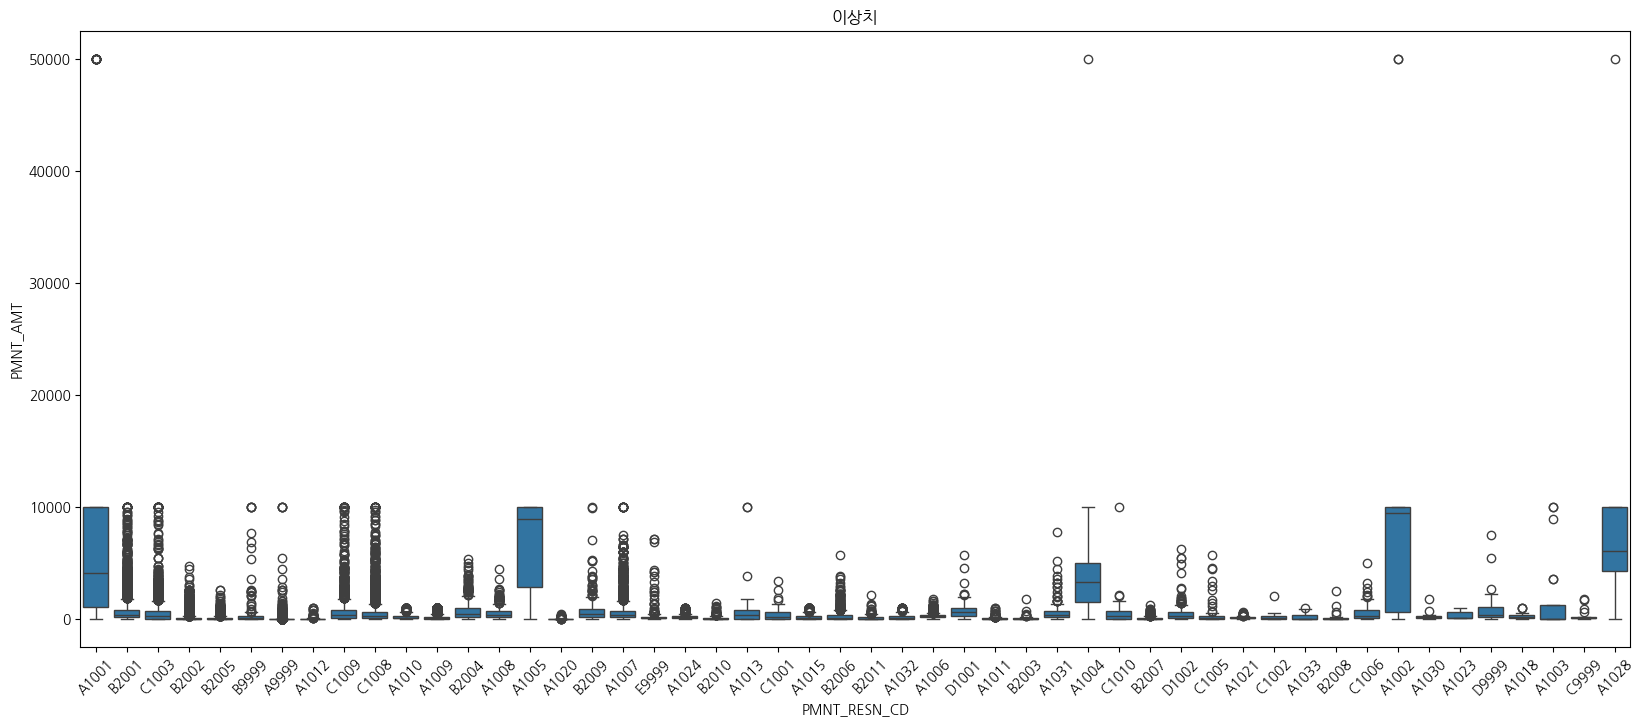

In [143]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='PMNT_RESN_CD', y='PMNT_AMT', data=pmntdtl)
plt.title('지급사유별 지급금액')
plt.xlabel('PMNT_RESN_CD')
plt.ylabel('PMNT_AMT')
plt.xticks(rotation=45)
plt.show()

* 5억원으로 찍힌 건들의 지급사유가 사망/후유장해로, 사망이나 후유장해로는
그만한 보험금이 지급될 수 있어서 마냥 이상치라고 제거하기 애매함
=> 추후에 정규화?

In [145]:
pmntdtl_over10000 = pmntdtl[pmntdtl['PMNT_AMT'] >= 10000]
pmntdtl_over10000

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT
0,1132050,953774,8,8482978,1172,A1001,201809,1,1,10000
38,1813226,1681361,3,9619596,3027,A1005,201809,1,1,10000
135,639086,58826,8,881350,2947,A1005,201808,1,1,10000
152,1380521,62563,6,2050406,2547,A1005,201908,1,1,10000
336,750317,610230,8,2404417,1170,A1005,201910,1,1,10000
...,...,...,...,...,...,...,...,...,...,...
70189,1579588,1331273,6,9637519,393,C1008,201904,14,1,10000
70899,1710653,1441408,6,9496697,3356,C1008,201902,14,1,10000
70955,1177554,991826,8,1061594,1172,A1005,202004,1,1,10000
71006,1531412,1290569,6,8009945,665,A1005,201812,1,1,10000


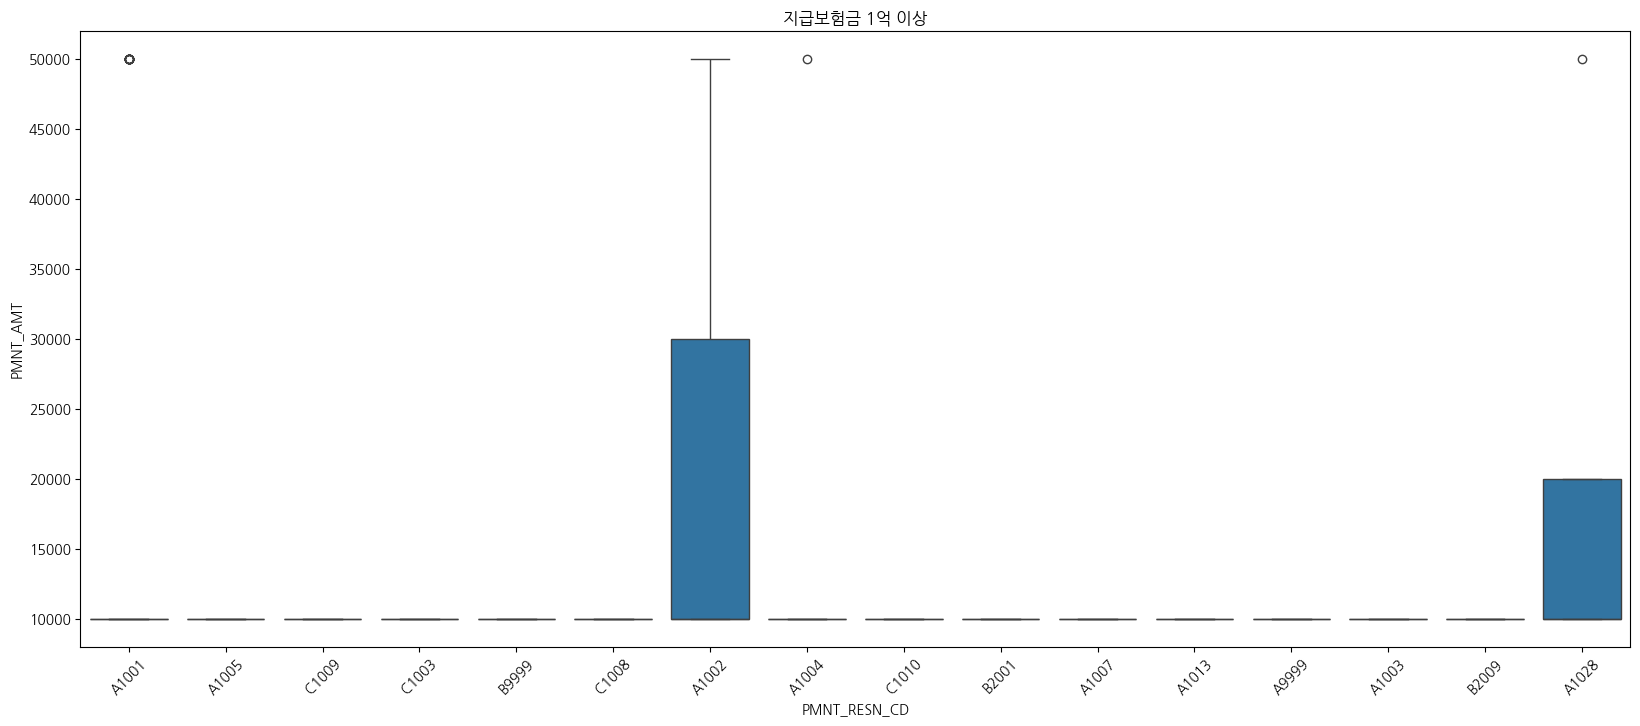

In [146]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='PMNT_RESN_CD', y='PMNT_AMT', data=pmntdtl_over10000)
plt.title('지급보험금 1억 이상')
plt.xlabel('PMNT_RESN_CD')
plt.ylabel('PMNT_AMT')
plt.xticks(rotation=45)
plt.show()

In [147]:
pmntdtl[pmntdtl['PMNT_AMT'] >= 50000]

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT
2337,985146,829699,6,8838549,3454,A1001,201908,1,1,50000
6321,323094,940393,8,7104251,652,A1001,201903,1,1,50000
6534,240219,913993,8,2420829,2947,A1001,201904,1,1,50000
7418,822409,1632978,8,7448140,652,A1001,202001,1,1,50000
12185,218806,183780,8,6830587,2174,A1001,202002,1,1,50000
14494,790828,1530464,3,8531568,3027,A1001,201903,1,1,50000
27334,1023060,1632063,6,9859282,2547,A1004,202006,1,1,50000
31810,1342668,356625,8,3566082,825,A1001,201907,1,1,50000
32629,552153,1225336,8,7533400,652,A1001,201906,1,1,50000
39650,822409,1632978,8,2328083,652,A1001,202001,1,1,50000


# 전처리

## 1.Table 5_청구사고정보

보험계약 테이블과 청구사고 테이블 묶기 위해 차주일련번호만 사용

**[전처리 기준]**
- 차주일련번호, 청구일련번호, 사고일련번호: 키
- 차주구분코드, 개인여부: 개인(1)만 남기고 drop 후 컬럼 자체 삭제

In [7]:
accd

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,ACCD_SN,REQ_SN,IS_INDIV,GIS_CD,ACCD_DT,FST_RPT_DT,ACCD_GIS_CD,IN_DRV_RLTN_CD
0,514694,1,8,5561038,0,2292889,839524,1,99,201905,201905,99,0
1,1666172,1,8,1604841,0,598965,1898453,1,36,201902,201905,99,0
2,67340,1,6,5144128,0,797919,672190,1,23,202006,202006,23,99
3,1790965,1,3,8278365,0,1132823,1609635,1,38,201904,201904,99,0
4,980616,1,6,8670561,0,673077,566526,1,11,201911,202003,99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41342,470724,1,8,275275,0,1252459,1431063,1,25,201901,201906,99,0
41343,81437,1,6,8020811,0,2130087,1794822,1,33,202001,202001,99,0
41344,689368,1,6,6513234,0,376683,547171,1,99,201806,201807,99,0
41345,263114,1,3,1108441,0,76699,672689,1,39,201909,202003,99,0


In [8]:
accd.agg(['count', 'size', 'nunique'])

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,ACCD_SN,REQ_SN,IS_INDIV,GIS_CD,ACCD_DT,FST_RPT_DT,ACCD_GIS_CD,IN_DRV_RLTN_CD
count,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347
size,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347,41347
nunique,17591,1,3,22189,1,39650,33603,1,17,25,25,17,6


In [9]:
accd_p = accd[accd['JOIN_SN_TYP'] == 1]

In [10]:
accd_uniq_valid = accd_p.groupby(['ACCD_SN', 'REQ_SN'])['JOIN_SN'].nunique().reset_index()
display(accd_uniq_valid.agg(['count', 'size', 'nunique']))

,ACCD_SN,REQ_SN,JOIN_SN
count,41347,41347,41347
size,41347,41347,41347
nunique,39650,33603,1


In [11]:
accd_df = pd.merge(accd_uniq_valid[['ACCD_SN', 'REQ_SN']], accd[['JOIN_SN', 'ACCD_SN', 'REQ_SN']], on=['ACCD_SN', 'REQ_SN'], how='inner')
accd_df

,ACCD_SN,REQ_SN,JOIN_SN
0,9,913728,235592
1,24,547171,1883117
2,32,1602585,882748
3,58,42,162295
4,162,355415,937255
...,...,...,...
41342,2302354,955442,453610
41343,2302470,1939888,1471795
41344,2302484,1800290,1250923
41345,2302484,1823585,1250923


## 2.Table 6_청구지급사유정보

청구지급상세사유정보에는 없는 보험종류코드를 위해 전처리

**전처리 기준**
- 청구일련번호, 사고일련번호: 키
- 보험종류코드
    - 사망류: 종신(01), 정기(02) : a
    - 질병류: 질병(03), 암(05) : b
    - 상해보험(04) 단독 : c
    - 어린이보험(07), 실비보험(16) : d
    - 운전자(13) 단독 : e
    - 여행자(14) 단독 : f
    - 연금저축(09), 연금(10), 저축(11) : g
    - 기타: 간병(06), 치아(08), 교육(12), 골프(15), 기타보험(99) : h
    - 값 없음(0건): 자동차(17), 배상책임(19). 무시. : i

In [12]:
pmnt

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,INS_GBN_CD,VCTM_SN,PMNT_RESN_CD,PMNT_DT,IS_PMNT_INVST,PMNT_JDGMNT_CD
0,1433170,1818958,6,9641244,4,2547,B2005,202005,0,1
1,797449,671787,6,5047760,17,260,C1008,201808,1,11
2,2715,1162881,6,8072495,17,3152,C1008,201901,1,11
3,1733094,182346,8,6628089,16,2947,B2002,202002,0,1
4,681773,524001,8,9746704,1,652,B2002,201912,0,1
...,...,...,...,...,...,...,...,...,...,...
67794,302072,1756207,6,7106786,4,23,B2002,201904,0,1
67795,144869,122001,6,3737241,4,2199,A9999,201808,0,3
67796,1029524,867235,6,8830641,3,1930,B2002,201901,0,1
67797,1189558,592357,8,7362949,3,2947,A1009,201905,0,1


In [13]:
pmnt.agg(['count', 'size', 'nunique'])

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,INS_GBN_CD,VCTM_SN,PMNT_RESN_CD,PMNT_DT,IS_PMNT_INVST,PMNT_JDGMNT_CD
count,67799,67799,67799,67799,67799,67799,67799,67799,67799,67799
size,67799,67799,67799,67799,67799,67799,67799,67799,67799,67799
nunique,38742,32798,3,25277,19,368,50,25,2,8


In [14]:
# 청구사고정보에서 JOIN_SN 차주일련번호 가져와서 붙이기 => 'ACCD_SN' 사고일련번호 & 'REQ_SN' 청구일련번호를 기준으로 차주일련번호 붙이기
pmnt_joinsn = pd.merge(pmnt, accd_df[['JOIN_SN', 'ACCD_SN', 'REQ_SN']], on=['ACCD_SN', 'REQ_SN'], how='inner')
pmnt_joinsn

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,INS_GBN_CD,VCTM_SN,PMNT_RESN_CD,PMNT_DT,IS_PMNT_INVST,PMNT_JDGMNT_CD,JOIN_SN
0,1433170,1818958,6,9641244,4,2547,B2005,202005,0,1,943833
1,1433170,1818958,6,9641244,4,2547,A1006,202005,0,1,943833
2,797449,671787,6,5047760,17,260,C1008,201808,1,11,1941009
3,797449,671787,6,5047760,17,2456,C1009,201807,1,13,1941009
4,2715,1162881,6,8072495,17,3152,C1008,201901,1,11,503856
...,...,...,...,...,...,...,...,...,...,...,...
67792,2265910,955442,6,1558111,4,1476,B2002,201901,0,1,439991
67793,1188714,1001209,6,6886821,17,1932,C1008,201807,1,11,365091
67794,2218121,1127169,8,7431894,3,652,B2005,201905,0,1,477072
67795,1189558,592357,8,7362949,3,2947,A1009,201905,0,1,1537577


* 청구사고정보에 없는 데이터 2개 행

In [15]:
pmnt_joinsn_null = pd.merge(pmnt, accd_df[['JOIN_SN', 'ACCD_SN', 'REQ_SN']], on=['ACCD_SN', 'REQ_SN'], how='left')
pmnt_joinsn_null[pmnt_joinsn_null['JOIN_SN'].isnull()]

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,INS_GBN_CD,VCTM_SN,PMNT_RESN_CD,PMNT_DT,IS_PMNT_INVST,PMNT_JDGMNT_CD,JOIN_SN
21655,109685,1733691,8,237912,3,825,A1007,201903,0,1,NaN
66213,2205739,547171,6,2853953,3,2001,B2005,201812,1,1,NaN


In [16]:
pmnt_joinsn.isnull().sum()

ACCD_SN           0
REQ_SN            0
SCTR_CD           0
POL_SN            0
INS_GBN_CD        0
VCTM_SN           0
PMNT_RESN_CD      0
PMNT_DT           0
IS_PMNT_INVST     0
PMNT_JDGMNT_CD    0
JOIN_SN           0
dtype: int64

In [17]:
pmnt_joinsn.agg(['count', 'size', 'nunique'])

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,INS_GBN_CD,VCTM_SN,PMNT_RESN_CD,PMNT_DT,IS_PMNT_INVST,PMNT_JDGMNT_CD,JOIN_SN
count,67797,67797,67797,67797,67797,67797,67797,67797,67797,67797,67797
size,67797,67797,67797,67797,67797,67797,67797,67797,67797,67797,67797
nunique,38742,32798,3,25276,19,368,50,25,2,8,17230


In [18]:
# 지급사유코드 재라벨링 전 개수 카운트
pmnt_joinsn.groupby(['INS_GBN_CD']).size().reset_index(name='counts')

,INS_GBN_CD,counts
0,1,2708
1,2,434
2,3,16494
3,4,16662
4,5,359
5,6,23
6,7,9684
7,8,860
8,9,78
9,10,76


In [19]:
pmnt_relabel = pmnt_joinsn.copy()

In [20]:
'''
아래 기준으로 재라밸링
    - 사망류: 종신(01), 정기(02) : a
    - 질병류: 질병(03), 암(05) : b
    - 상해보험(04) 단독 : c
    - 어린이보험(07), 실비보험(16) : d
    - 운전자(13) 단독 : e
    - 여행자(14) 단독 : f
    - 연금저축(09), 연금(10), 저축(11) : g
    - 기타: 간병(06), 치아(08), 교육(12), 골프(15), 기타보험(99) : h
    - 자동차(17), 화재/재물보험(18), 배상책임(19). : 각각 i, j, k

    자동차, 화재/재물보험은 값이 있고, 배상책임은 없음
'''

pmnt_relabel.loc[pmnt_relabel['INS_GBN_CD'].isin([1, 2]), 'INS_GBN_CD'] = 'a'
pmnt_relabel.loc[pmnt_relabel['INS_GBN_CD'].isin([3, 5]), 'INS_GBN_CD'] = 'b'
pmnt_relabel.loc[pmnt_relabel['INS_GBN_CD'].isin([4]), 'INS_GBN_CD'] = 'c'
pmnt_relabel.loc[pmnt_relabel['INS_GBN_CD'].isin([7, 16]), 'INS_GBN_CD'] = 'd'
pmnt_relabel.loc[pmnt_relabel['INS_GBN_CD'].isin([13]), 'INS_GBN_CD'] = 'e'
pmnt_relabel.loc[pmnt_relabel['INS_GBN_CD'].isin([14]), 'INS_GBN_CD'] = 'f'
pmnt_relabel.loc[pmnt_relabel['INS_GBN_CD'].isin([9, 10, 11]), 'INS_GBN_CD'] = 'g'
pmnt_relabel.loc[pmnt_relabel['INS_GBN_CD'].isin([6, 8, 12, 15, 99]), 'INS_GBN_CD'] = 'h'
pmnt_relabel.loc[pmnt_relabel['INS_GBN_CD'].isin([17]), 'INS_GBN_CD'] = 'i'
pmnt_relabel.loc[pmnt_relabel['INS_GBN_CD'].isin([18]), 'INS_GBN_CD'] = 'j'
pmnt_relabel.loc[pmnt_relabel['INS_GBN_CD'].isin([19]), 'INS_GBN_CD'] = 'k'

In [21]:
pmnt_relabel

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,INS_GBN_CD,VCTM_SN,PMNT_RESN_CD,PMNT_DT,IS_PMNT_INVST,PMNT_JDGMNT_CD,JOIN_SN
0,1433170,1818958,6,9641244,c,2547,B2005,202005,0,1,943833
1,1433170,1818958,6,9641244,c,2547,A1006,202005,0,1,943833
2,797449,671787,6,5047760,i,260,C1008,201808,1,11,1941009
3,797449,671787,6,5047760,i,2456,C1009,201807,1,13,1941009
4,2715,1162881,6,8072495,i,3152,C1008,201901,1,11,503856
...,...,...,...,...,...,...,...,...,...,...,...
67792,2265910,955442,6,1558111,c,1476,B2002,201901,0,1,439991
67793,1188714,1001209,6,6886821,i,1932,C1008,201807,1,11,365091
67794,2218121,1127169,8,7431894,b,652,B2005,201905,0,1,477072
67795,1189558,592357,8,7362949,b,2947,A1009,201905,0,1,1537577


In [22]:
# 재라벨링된 지급사유코드 건수 카운트
pmnt_relabel.groupby(['INS_GBN_CD']).size().reset_index(name='counts')

,INS_GBN_CD,counts
0,a,3142
1,b,16853
2,c,16662
3,d,12627
4,e,1709
5,f,261
6,g,313
7,h,5388
8,i,10750
9,j,92


In [23]:
# 원핫인코딩 get_dummies 참고 : https://mizykk.tistory.com/13  +  prefix 참고 : https://hongl.tistory.com/89
pd.get_dummies(pmnt_relabel)

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_DT,IS_PMNT_INVST,PMNT_JDGMNT_CD,JOIN_SN,INS_GBN_CD_a,INS_GBN_CD_b,INS_GBN_CD_c,INS_GBN_CD_d,INS_GBN_CD_e,INS_GBN_CD_f,INS_GBN_CD_g,INS_GBN_CD_h,INS_GBN_CD_i,INS_GBN_CD_j,PMNT_RESN_CD_A1001,PMNT_RESN_CD_A1002,PMNT_RESN_CD_A1003,PMNT_RESN_CD_A1004,PMNT_RESN_CD_A1005,PMNT_RESN_CD_A1006,PMNT_RESN_CD_A1007,PMNT_RESN_CD_A1008,PMNT_RESN_CD_A1009,PMNT_RESN_CD_A1010,PMNT_RESN_CD_A1011,PMNT_RESN_CD_A1012,PMNT_RESN_CD_A1013,PMNT_RESN_CD_A1015,PMNT_RESN_CD_A1018,PMNT_RESN_CD_A1020,PMNT_RESN_CD_A1021,PMNT_RESN_CD_A1023,PMNT_RESN_CD_A1024,PMNT_RESN_CD_A1028,PMNT_RESN_CD_A1030,PMNT_RESN_CD_A1031,PMNT_RESN_CD_A1032,PMNT_RESN_CD_A1033,PMNT_RESN_CD_A9999,PMNT_RESN_CD_B2001,PMNT_RESN_CD_B2002,PMNT_RESN_CD_B2003,PMNT_RESN_CD_B2004,PMNT_RESN_CD_B2005,PMNT_RESN_CD_B2006,PMNT_RESN_CD_B2007,PMNT_RESN_CD_B2008,PMNT_RESN_CD_B2009,PMNT_RESN_CD_B2010,PMNT_RESN_CD_B2011,PMNT_RESN_CD_B9999,PMNT_RESN_CD_C1001,PMNT_RESN_CD_C1002,PMNT_RESN_CD_C1003,PMNT_RESN_CD_C1005,PMNT_RESN_CD_C1006,PMNT_RESN_CD_C1008,PMNT_RESN_CD_C1009,PMNT_RESN_CD_C1010,PMNT_RESN_CD_C9999,PMNT_RESN_CD_D1001,PMNT_RESN_CD_D1002,PMNT_RESN_CD_D9999,PMNT_RESN_CD_E9999
0,1433170,1818958,6,9641244,2547,202005,0,1,943833,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,1433170,1818958,6,9641244,2547,202005,0,1,943833,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,797449,671787,6,5047760,260,201808,1,11,1941009,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,797449,671787,6,5047760,2456,201807,1,13,1941009,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,2715,1162881,6,8072495,3152,201901,1,11,503856,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67792,2265910,955442,6,1558111,1476,201901,0,1,439991,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
67793,1188714,1001209,6,6886821,1932,201807,1,11,365091,False,False,False,False,False,False,False,Fals

In [25]:
# 필요한 컬럼만 추출
pmnt_drop_col = pmnt_relabel[['JOIN_SN', 'ACCD_SN', 'REQ_SN', 'POL_SN', 'PMNT_RESN_CD', 'INS_GBN_CD']]

In [26]:
pmnt_drop_col

,JOIN_SN,ACCD_SN,REQ_SN,POL_SN,PMNT_RESN_CD,INS_GBN_CD
0,943833,1433170,1818958,9641244,B2005,c
1,943833,1433170,1818958,9641244,A1006,c
2,1941009,797449,671787,5047760,C1008,i
3,1941009,797449,671787,5047760,C1009,i
4,503856,2715,1162881,8072495,C1008,i
...,...,...,...,...,...,...
67792,439991,2265910,955442,1558111,B2002,c
67793,365091,1188714,1001209,6886821,C1008,i
67794,477072,2218121,1127169,7431894,B2005,b
67795,1537577,1189558,592357,7362949,A1009,b


In [27]:
# 중복되는 행 삭제
uniq_pmnt_drop_col = pmnt_drop_col.drop_duplicates()
uniq_pmnt_drop_col

,JOIN_SN,ACCD_SN,REQ_SN,POL_SN,PMNT_RESN_CD,INS_GBN_CD
0,943833,1433170,1818958,9641244,B2005,c
1,943833,1433170,1818958,9641244,A1006,c
2,1941009,797449,671787,5047760,C1008,i
3,1941009,797449,671787,5047760,C1009,i
4,503856,2715,1162881,8072495,C1008,i
...,...,...,...,...,...,...
67792,439991,2265910,955442,1558111,B2002,c
67793,365091,1188714,1001209,6886821,C1008,i
67794,477072,2218121,1127169,7431894,B2005,b
67795,1537577,1189558,592357,7362949,A1009,b


In [29]:
# pmntdtl_pivot1 = pd.pivot_table(pmntdtl_group, index=['JOIN_SN'], columns=['INS_GBN_CD'], values=['지급금액', '지급건수'], aggfunc={'지급금액': 'sum', '지급건수': 'sum'}, fill_value=0)

* 더미 변수로 변환 연습

In [30]:
pd.get_dummies(pmnt_drop_col, columns=['INS_GBN_CD'])

,JOIN_SN,ACCD_SN,REQ_SN,POL_SN,PMNT_RESN_CD,INS_GBN_CD_a,INS_GBN_CD_b,INS_GBN_CD_c,INS_GBN_CD_d,INS_GBN_CD_e,INS_GBN_CD_f,INS_GBN_CD_g,INS_GBN_CD_h,INS_GBN_CD_i,INS_GBN_CD_j
0,943833,1433170,1818958,9641244,B2005,False,False,True,False,False,False,False,False,False,False
1,943833,1433170,1818958,9641244,A1006,False,False,True,False,False,False,False,False,False,False
2,1941009,797449,671787,5047760,C1008,False,False,False,False,False,False,False,False,True,False
3,1941009,797449,671787,5047760,C1009,False,False,False,False,False,False,False,False,True,False
4,503856,2715,1162881,8072495,C1008,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67792,439991,2265910,955442,1558111,B2002,False,False,True,False,False,False,False,False,False,False
67793,365091,1188714,1001209,6886821,C1008,False,False,False,False,False,False,False,False,True,False
67794,477072,2218121,1127169,7431894,B2005,False,True,False,False,False,False,False,False,False,False
67795,1537577,1189558,592357,7362949,A1009,False,True,False,False,False,False,False,False,False,False


In [31]:
pd.get_dummies(pmnt_drop_col, columns=['INS_GBN_CD'], prefix='보종그룹', prefix_sep='_')

,JOIN_SN,ACCD_SN,REQ_SN,POL_SN,PMNT_RESN_CD,보종그룹_a,보종그룹_b,보종그룹_c,보종그룹_d,보종그룹_e,보종그룹_f,보종그룹_g,보종그룹_h,보종그룹_i,보종그룹_j
0,943833,1433170,1818958,9641244,B2005,False,False,True,False,False,False,False,False,False,False
1,943833,1433170,1818958,9641244,A1006,False,False,True,False,False,False,False,False,False,False
2,1941009,797449,671787,5047760,C1008,False,False,False,False,False,False,False,False,True,False
3,1941009,797449,671787,5047760,C1009,False,False,False,False,False,False,False,False,True,False
4,503856,2715,1162881,8072495,C1008,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67792,439991,2265910,955442,1558111,B2002,False,False,True,False,False,False,False,False,False,False
67793,365091,1188714,1001209,6886821,C1008,False,False,False,False,False,False,False,False,True,False
67794,477072,2218121,1127169,7431894,B2005,False,True,False,False,False,False,False,False,False,False
67795,1537577,1189558,592357,7362949,A1009,False,True,False,False,False,False,False,False,False,False


In [32]:
pmnt_TF = pd.get_dummies(pmnt_drop_col, columns=['INS_GBN_CD'], prefix='', prefix_sep='')
pmnt_TF

,JOIN_SN,ACCD_SN,REQ_SN,POL_SN,PMNT_RESN_CD,a,b,c,d,e,f,g,h,i,j
0,943833,1433170,1818958,9641244,B2005,False,False,True,False,False,False,False,False,False,False
1,943833,1433170,1818958,9641244,A1006,False,False,True,False,False,False,False,False,False,False
2,1941009,797449,671787,5047760,C1008,False,False,False,False,False,False,False,False,True,False
3,1941009,797449,671787,5047760,C1009,False,False,False,False,False,False,False,False,True,False
4,503856,2715,1162881,8072495,C1008,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67792,439991,2265910,955442,1558111,B2002,False,False,True,False,False,False,False,False,False,False
67793,365091,1188714,1001209,6886821,C1008,False,False,False,False,False,False,False,False,True,False
67794,477072,2218121,1127169,7431894,B2005,False,True,False,False,False,False,False,False,False,False
67795,1537577,1189558,592357,7362949,A1009,False,True,False,False,False,False,False,False,False,False


In [33]:
pmnt_01 = pmnt_TF.astype({'a': 'int', 'b': 'int', 'c': 'int', 'd': 'int', 'e': 'int', 'f': 'int', 'g': 'int', 'h': 'int', 'i': 'int', 'j': 'int'})
pmnt_01

,JOIN_SN,ACCD_SN,REQ_SN,POL_SN,PMNT_RESN_CD,a,b,c,d,e,f,g,h,i,j
0,943833,1433170,1818958,9641244,B2005,0,0,1,0,0,0,0,0,0,0
1,943833,1433170,1818958,9641244,A1006,0,0,1,0,0,0,0,0,0,0
2,1941009,797449,671787,5047760,C1008,0,0,0,0,0,0,0,0,1,0
3,1941009,797449,671787,5047760,C1009,0,0,0,0,0,0,0,0,1,0
4,503856,2715,1162881,8072495,C1008,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67792,439991,2265910,955442,1558111,B2002,0,0,1,0,0,0,0,0,0,0
67793,365091,1188714,1001209,6886821,C1008,0,0,0,0,0,0,0,0,1,0
67794,477072,2218121,1127169,7431894,B2005,0,1,0,0,0,0,0,0,0,0
67795,1537577,1189558,592357,7362949,A1009,0,1,0,0,0,0,0,0,0,0


In [34]:
pmnt_01.groupby(['JOIN_SN', 'POL_SN']).sum()

ACCD_SN   REQ_SN PMNT_RESN_CD  a  b  c  d  e  f  g  h  i  j
JOIN_SN POL_SN                                                              
8       6261020  1988103   955442        A1024  0  0  0  0  1  0  0  0  0  0
98      8528823  1631423  1755283   B2002B2002  0  0  0  2  0  0  0  0  0  0
514     3598146  1578744   525881   B2002B2001  0  2  0  0  0  0  0  0  0  0
        5594473  1885888  1588986        C1008  0  0  0  0  0  0  0  0  1  0
        5627695  1515418  1277043        A1009  0  1  0  0  0  0  0  0  0  0
...                  ...      ...          ... .. .. .. .. .. .. .. .. .. ..
1959155 3152491  1427253  1456074        A1007  0  0  0  1  0  0  0  0  0  0
        6012439  1315104   955442        B2002  0  0  1  0  0  0  0  0  0  0
        6164772  1427253  1456074        A1007  1  0  0  0  0  0  0  0  0  0
1959315 7242634   900653  1794955        B2002  0  0  1  0  0  0  0  0  0  0
1959574 73902     155902   955442        B2002  0  1  0  0  0  0  0  0  0  0

[25633 rows x 13 columns]

In [35]:
pmnt_01.groupby(['JOIN_SN', 'POL_SN'])[['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']].sum()

a  b  c  d  e  f  g  h  i
JOIN_SN POL_SN                            
8       6261020  0  0  0  0  1  0  0  0  0
98      8528823  0  0  0  2  0  0  0  0  0
514     3598146  0  2  0  0  0  0  0  0  0
        5594473  0  0  0  0  0  0  0  0  1
        5627695  0  1  0  0  0  0  0  0  0
...             .. .. .. .. .. .. .. .. ..
1959155 3152491  0  0  0  1  0  0  0  0  0
        6012439  0  0  1  0  0  0  0  0  0
        6164772  1  0  0  0  0  0  0  0  0
1959315 7242634  0  0  1  0  0  0  0  0  0
1959574 73902    0  1  0  0  0  0  0  0  0

[25633 rows x 9 columns]

In [36]:
# 궁극적으로는 차주 별 행이 1개가 나오도록 데이터 가공해야
pmnt_01.groupby(['JOIN_SN'])[['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']].sum()

,a,b,c,d,e,f,g,h,i
JOIN_SN,,,,,,,,,
8,0,0,0,0,1,0,0,0,0
98,0,0,0,2,0,0,0,0,0
514,0,3,0,0,0,0,0,0,1
608,0,0,0,0,0,0,0,0,1
1064,0,7,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1958773,0,0,0,4,0,0,0,0,0
1959050,0,0,4,0,0,0,0,0,0
1959155,1,0,1,1,0,0,0,0,0


* 한 증권번호에 보종 그룹이 여러개

In [37]:
pmnt_joinsn[pmnt_joinsn['POL_SN'] == 7812010]

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,INS_GBN_CD,VCTM_SN,PMNT_RESN_CD,PMNT_DT,IS_PMNT_INVST,PMNT_JDGMNT_CD,JOIN_SN
7418,1227617,1034023,8,7812010,3,2213,A1031,201908,0,1,1084430
7419,1227617,1034023,8,7812010,99,2213,A1010,201908,0,1,1084430
7420,1227617,1034023,8,7812010,99,2213,A1006,201908,0,1,1084430
7421,1227617,1034023,8,7812010,99,2213,A1008,201908,0,1,1084430
7422,1227617,1034023,8,7812010,3,2213,A1032,201908,0,1,1084430
7423,1227617,1034023,8,7812010,99,2213,A1032,201908,0,1,1084430


## 3.Table 7_청구지급사유상세정보

**전처리 기준**
- 드랍 컬럼: 업권코드, 피해자물일련번호, 지급월, 상세지급일련번호
- 청구일련번호 + 사고일련번호 + 증권번호: 키
- 지급금액 ok
- 지급사유코드 + 지급사유상세코드 = 새로운 범주로 만들기
    - 사망, 후유장해
    - 진단, 통원
    - 수술, 입원
    - 간병, 치과치료, 응급치료, 깁스치료, 워로금, 운전자비용, 교통사고비용, 기타 인보험(정액)
    - 실손 (일단 퉁치는데, 필요시 질병/상해 구분)
    - 자동차보험 (일단 퉁치고 필요시 대인/대물 구분)
    - 일상생활배상, 가족생활배상, 기타 배상책임보험
    - 화재/재물보험

In [38]:
pmntdtl

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT
0,1132050,953774,8,8482978,1172,A1001,201809,1,1,10000
1,2141286,76910,6,3612735,23,B2001,202001,1,1,9400
2,1493931,1258813,6,9435298,2857,C1003,202003,12,1,600
3,122531,103007,6,7984136,665,B2001,202002,1,1,1300
4,1740460,1466487,6,3332223,3298,B2002,201909,1,1,200
...,...,...,...,...,...,...,...,...,...,...
71244,385388,324468,6,7894826,665,B2002,201910,1,1,170
71245,1410627,1754272,6,6915229,2547,B2002,201811,1,1,11
71246,430262,619986,6,7199202,2547,B2002,201809,1,1,78
71247,2253620,669803,6,5925060,2547,B2001,201807,1,1,1200


In [40]:
pmntdtl.agg(['count', 'size', 'nunique'])

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT
count,71249,71249,71249,71249,71249,71249,71249,71249,71249,71249
size,71249,71249,71249,71249,71249,71249,71249,71249,71249,71249
nunique,37890,31945,3,24719,356,50,25,12,13,273


### 3-1. 차주일련번호 붙이기

In [41]:
pmntdtl_joinsn = pd.merge(pmntdtl, accd_df[['JOIN_SN', 'ACCD_SN', 'REQ_SN']], on=['ACCD_SN', 'REQ_SN'], how='inner')
pmntdtl_joinsn

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT,JOIN_SN
0,1132050,953774,8,8482978,1172,A1001,201809,1,1,10000,1940888
1,2141286,76910,6,3612735,23,B2001,202001,1,1,9400,290246
2,2141286,76910,6,3612735,23,B2002,202001,1,1,280,290246
3,1493931,1258813,6,9435298,2857,C1003,202003,12,1,600,170197
4,1493931,1258813,6,9435298,260,C1008,202003,15,1,690,170197
...,...,...,...,...,...,...,...,...,...,...,...
71242,1733901,547171,6,8533941,2001,B2002,201905,1,1,90,154209
71243,2242016,955442,6,665213,1476,B2002,201901,1,1,19,868692
71244,1506436,1269337,6,9513702,2199,B2002,202001,1,1,17,284761
71245,430262,619986,6,7199202,2547,B2002,201809,1,1,78,143063


In [42]:
pmntdtl_joinsn.agg(['count', 'size', 'nunique'])

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT,JOIN_SN
count,71247,71247,71247,71247,71247,71247,71247,71247,71247,71247,71247
size,71247,71247,71247,71247,71247,71247,71247,71247,71247,71247,71247
nunique,37889,31945,3,24718,356,50,25,12,13,273,16965


* 청구사고정보에 없는 데이터 2개 행

In [43]:
pmntdtl_joinsn_null = pd.merge(pmntdtl, accd_df[['JOIN_SN', 'ACCD_SN', 'REQ_SN']], on=['ACCD_SN', 'REQ_SN'], how='left')
pmntdtl_joinsn_null[pmntdtl_joinsn_null['JOIN_SN'].isnull()]

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT,JOIN_SN
6718,2205739,547171,6,2853953,2001,B2005,201812,1,1,46,NaN
33778,109685,1733691,8,237912,825,A1007,201903,1,1,260,NaN


In [45]:
# 차주일련번호 붙인 테이블 : pmntdtl_joinsn
pmntdtl_joinsn

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT,JOIN_SN
0,1132050,953774,8,8482978,1172,A1001,201809,1,1,10000,1940888
1,2141286,76910,6,3612735,23,B2001,202001,1,1,9400,290246
2,2141286,76910,6,3612735,23,B2002,202001,1,1,280,290246
3,1493931,1258813,6,9435298,2857,C1003,202003,12,1,600,170197
4,1493931,1258813,6,9435298,260,C1008,202003,15,1,690,170197
...,...,...,...,...,...,...,...,...,...,...,...
71242,1733901,547171,6,8533941,2001,B2002,201905,1,1,90,154209
71243,2242016,955442,6,665213,1476,B2002,201901,1,1,19,868692
71244,1506436,1269337,6,9513702,2199,B2002,202001,1,1,17,284761
71245,430262,619986,6,7199202,2547,B2002,201809,1,1,78,143063


In [46]:
pmntdtl_joinsn.groupby(['JOIN_SN', 'POL_SN']).size().reset_index(name='counts')

,JOIN_SN,POL_SN,counts
0,8,6261020,1
1,98,8528823,2
2,514,3598146,2
3,514,5594473,3
4,514,5627695,1
...,...,...,...
25067,1959155,3152491,1
25068,1959155,6012439,1
25069,1959155,6164772,1
25070,1959315,7242634,1


In [47]:
# 보험종류코드 붙일 때 데이터 행이 늘어남, 늘어나는 행 확인하기 위해 행 번호 컬럼 생성
pmntdtl_joinsn.reset_index(inplace=True)
pmntdtl_joinsn.rename(columns={'index': '행 번호'}, inplace=True)

In [48]:
pmntdtl_joinsn

,행 번호,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT,JOIN_SN
0,0,1132050,953774,8,8482978,1172,A1001,201809,1,1,10000,1940888
1,1,2141286,76910,6,3612735,23,B2001,202001,1,1,9400,290246
2,2,2141286,76910,6,3612735,23,B2002,202001,1,1,280,290246
3,3,1493931,1258813,6,9435298,2857,C1003,202003,12,1,600,170197
4,4,1493931,1258813,6,9435298,260,C1008,202003,15,1,690,170197
...,...,...,...,...,...,...,...,...,...,...,...,...
71242,71242,1733901,547171,6,8533941,2001,B2002,201905,1,1,90,154209
71243,71243,2242016,955442,6,665213,1476,B2002,201901,1,1,19,868692
71244,71244,1506436,1269337,6,9513702,2199,B2002,202001,1,1,17,284761
71245,71245,430262,619986,6,7199202,2547,B2002,201809,1,1,78,143063


### 3-2. 보험종류코드 붙이기

* 청구지급사유정보에서 리라벨링된 보험종류 코드 붙여넣기

In [49]:
pmntdtl_bojong = pd.merge(pmntdtl_joinsn, uniq_pmnt_drop_col[['JOIN_SN', 'ACCD_SN', 'REQ_SN', 'POL_SN', 'INS_GBN_CD']], on=['JOIN_SN', 'ACCD_SN', 'REQ_SN', 'POL_SN'], how='left')
pmntdtl_bojong

,행 번호,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT,JOIN_SN,INS_GBN_CD
0,0,1132050,953774,8,8482978,1172,A1001,201809,1,1,10000,1940888,a
1,1,2141286,76910,6,3612735,23,B2001,202001,1,1,9400,290246,c
2,1,2141286,76910,6,3612735,23,B2001,202001,1,1,9400,290246,c
3,2,2141286,76910,6,3612735,23,B2002,202001,1,1,280,290246,c
4,2,2141286,76910,6,3612735,23,B2002,202001,1,1,280,290246,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112680,71242,1733901,547171,6,8533941,2001,B2002,201905,1,1,90,154209,d
112681,71243,2242016,955442,6,665213,1476,B2002,201901,1,1,19,868692,c
112682,71244,1506436,1269337,6,9513702,2199,B2002,202001,1,1,17,284761,b
112683,71245,430262,619986,6,7199202,2547,B2002,201809,1,1,78,143063,c


In [50]:
pmntdtl_bojong.agg(['count', 'size', 'nunique'])

,행 번호,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT,JOIN_SN,INS_GBN_CD
count,112685,112685,112685,112685,112685,112685,112685,112685,112685,112685,112685,112685,112685
size,112685,112685,112685,112685,112685,112685,112685,112685,112685,112685,112685,112685,112685
nunique,71247,37889,31945,3,24718,356,50,25,12,13,273,16965,10


In [51]:
pmntdtl_bojong.groupby(['JOIN_SN', 'POL_SN']).size().reset_index(name='counts')

,JOIN_SN,POL_SN,counts
0,8,6261020,1
1,98,8528823,2
2,514,3598146,2
3,514,5594473,3
4,514,5627695,1
...,...,...,...
25067,1959155,3152491,1
25068,1959155,6012439,1
25069,1959155,6164772,1
25070,1959315,7242634,1


### 3-3. 한 증권번호에 복수의 보종그룹이 있는 데이터 삭제

* 보험종류코드 붙이면 계속 행이 늘어나는 문제 발생
* 한 증권번호에 여러 보종이 붙어있어서 발생하는 문제

=> 하나의 증권번호에 여러 보종이 붙어있으면 전체 데이터 날리기

In [52]:
# 차주일련번호 + 증권번호가 중복되는 행만 추출
jarp_dupli = pmnt_drop_col[pmnt_drop_col.duplicated(subset=['JOIN_SN', 'POL_SN'], keep=False)]
jarp_dupli

,JOIN_SN,ACCD_SN,REQ_SN,POL_SN,PMNT_RESN_CD,INS_GBN_CD
0,943833,1433170,1818958,9641244,B2005,c
1,943833,1433170,1818958,9641244,A1006,c
2,1941009,797449,671787,5047760,C1008,i
3,1941009,797449,671787,5047760,C1009,i
5,1892803,1733094,182346,6628089,B2002,d
...,...,...,...,...,...,...
67791,1700429,495490,1704038,3138749,B2005,d
67792,439991,2265910,955442,1558111,B2002,c
67794,477072,2218121,1127169,7431894,B2005,b
67795,1537577,1189558,592357,7362949,A1009,b


In [53]:
jarp_dupli[jarp_dupli['JOIN_SN'] == 389937]

,JOIN_SN,ACCD_SN,REQ_SN,POL_SN,PMNT_RESN_CD,INS_GBN_CD
40414,389937,76991,955442,6560880,B2005,c
51075,389937,1148177,967341,6560880,D1002,h


In [56]:
# 차주일련번호 + 증권번호 기준으로 보종그룹의 고유 개수 카운트
aaa = jarp_dupli.groupby(['JOIN_SN', 'POL_SN'])['INS_GBN_CD'].nunique().reset_index()

In [57]:
aaa

,JOIN_SN,POL_SN,INS_GBN_CD
0,98,8528823,1
1,514,3598146,1
2,1064,6528927,1
3,1068,2826622,1
4,1068,3665819,1
...,...,...,...
14265,1958162,5294247,1
14266,1958466,1079286,1
14267,1958466,2956848,1
14268,1958773,9410448,1


In [59]:
# 보종그룹 고유개수가 2개 이상인 경우만 선택
bbb = aaa[aaa['INS_GBN_CD'] >= 2]

In [60]:
bbb

,JOIN_SN,POL_SN,INS_GBN_CD
77,11868,6557944,2
186,25578,9605986,2
903,133499,3636767,2
1038,149775,8692518,2
1051,151234,6050762,2
...,...,...,...
13933,1917652,5634788,2
14030,1930803,2394474,2
14049,1933181,5268361,2
14239,1955104,8112055,2


In [61]:
# 한 증권번호에 보종이 여러개인 건, 차주일련번호 + 증권번호만 남기기 => 제거해야 할 데이터
ccc = bbb.drop(columns=['INS_GBN_CD'])
ccc

,JOIN_SN,POL_SN
77,11868,6557944
186,25578,9605986
903,133499,3636767
1038,149775,8692518
1051,151234,6050762
...,...,...
13933,1917652,5634788
14030,1930803,2394474
14049,1933181,5268361
14239,1955104,8112055


In [62]:
ccc.agg(['count', 'size', 'nunique'])

,JOIN_SN,POL_SN
count,122,122
size,122,122
nunique,121,122


In [63]:
# 제거해야할 데이터 2차원 리스트로 만들기
del_data22 = ccc.values.tolist()
del_data22

[[11868, 6557944],
 [25578, 9605986],
 [133499, 3636767],
 [149775, 8692518],
 [151234, 6050762],
 [167225, 3879671],
 [173456, 8913603],
 [247979, 5319403],
 [251521, 5752795],
 [254426, 1115101],
 [258510, 4731169],
 [260826, 7506078],
 [288427, 1642239],
 [290246, 3612735],
 [317505, 9547813],
 [319634, 6377039],
 [320348, 4911108],
 [349658, 1536331],
 [352697, 5240876],
 [389937, 6560880],
 [391416, 684937],
 [418908, 9210847],
 [428636, 481255],
 [477396, 1254687],
 [480998, 5277399],
 [486568, 5737270],
 [529812, 8575518],
 [566608, 3121528],
 [567444, 8410660],
 [579335, 3943074],
 [600335, 8988414],
 [629224, 5763444],
 [631024, 4935605],
 [698302, 633984],
 [706430, 1555563],
 [719530, 4565702],
 [734959, 7138102],
 [765355, 3858731],
 [779660, 2112917],
 [826593, 1571185],
 [835664, 9826521],
 [838388, 6844724],
 [838388, 7098888],
 [863093, 2558733],
 [893174, 2819947],
 [897063, 3282528],
 [924847, 6660572],
 [941430, 8950720],
 [946230, 2242110],
 [948018, 1507332],
 [970

* 삭제할 증권번호 데이터 테이블 만들기
  * 차주일련번호와 증권번호가 중복되는 행은 하나만 남기고 삭제 : 데이터프레임명 del_data22

In [65]:
pmntdtl_joinsn

,행 번호,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT,JOIN_SN
0,0,1132050,953774,8,8482978,1172,A1001,201809,1,1,10000,1940888
1,1,2141286,76910,6,3612735,23,B2001,202001,1,1,9400,290246
2,2,2141286,76910,6,3612735,23,B2002,202001,1,1,280,290246
3,3,1493931,1258813,6,9435298,2857,C1003,202003,12,1,600,170197
4,4,1493931,1258813,6,9435298,260,C1008,202003,15,1,690,170197
...,...,...,...,...,...,...,...,...,...,...,...,...
71242,71242,1733901,547171,6,8533941,2001,B2002,201905,1,1,90,154209
71243,71243,2242016,955442,6,665213,1476,B2002,201901,1,1,19,868692
71244,71244,1506436,1269337,6,9513702,2199,B2002,202001,1,1,17,284761
71245,71245,430262,619986,6,7199202,2547,B2002,201809,1,1,78,143063


* pmntdtl_joinsn에서 del_data22와 차주일련&증권번호가 일치하는 행은 삭제 후 pmntdtl_joinsn2로 저장

In [66]:
pmntdtl_joinsn2 = pmntdtl_joinsn.copy()

In [67]:
for row in del_data22:
    pmntdtl_joinsn2 = pmntdtl_joinsn2[~((pmntdtl_joinsn2['JOIN_SN'] == row[0]) & (pmntdtl_joinsn2['POL_SN'] == row[1]))]

In [68]:
pmntdtl_joinsn2

,행 번호,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT,JOIN_SN
0,0,1132050,953774,8,8482978,1172,A1001,201809,1,1,10000,1940888
3,3,1493931,1258813,6,9435298,2857,C1003,202003,12,1,600,170197
4,4,1493931,1258813,6,9435298,260,C1008,202003,15,1,690,170197
5,5,1493931,1258813,6,9435298,2857,C1003,202004,11,1,140,170197
6,6,122531,103007,6,7984136,665,B2001,202002,1,1,1300,335581
...,...,...,...,...,...,...,...,...,...,...,...,...
71242,71242,1733901,547171,6,8533941,2001,B2002,201905,1,1,90,154209
71243,71243,2242016,955442,6,665213,1476,B2002,201901,1,1,19,868692
71244,71244,1506436,1269337,6,9513702,2199,B2002,202001,1,1,17,284761
71245,71245,430262,619986,6,7199202,2547,B2002,201809,1,1,78,143063


In [69]:
pmntdtl_joinsn

,행 번호,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT,JOIN_SN
0,0,1132050,953774,8,8482978,1172,A1001,201809,1,1,10000,1940888
1,1,2141286,76910,6,3612735,23,B2001,202001,1,1,9400,290246
2,2,2141286,76910,6,3612735,23,B2002,202001,1,1,280,290246
3,3,1493931,1258813,6,9435298,2857,C1003,202003,12,1,600,170197
4,4,1493931,1258813,6,9435298,260,C1008,202003,15,1,690,170197
...,...,...,...,...,...,...,...,...,...,...,...,...
71242,71242,1733901,547171,6,8533941,2001,B2002,201905,1,1,90,154209
71243,71243,2242016,955442,6,665213,1476,B2002,201901,1,1,19,868692
71244,71244,1506436,1269337,6,9513702,2199,B2002,202001,1,1,17,284761
71245,71245,430262,619986,6,7199202,2547,B2002,201809,1,1,78,143063


* 468개 행, 122개의 고유 차주일련번호&증권번호 쌍 삭제

In [70]:
pmntdtl_joinsn2[pmntdtl_joinsn2['JOIN_SN'] == 1084430]

,행 번호,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT,JOIN_SN
8527,8527,808627,810264,8,5026262,825,A1021,201908,1,1,180,1084430
8528,8528,808627,810264,8,5026262,825,A1008,201908,1,1,720,1084430
8529,8529,808627,810264,8,5026262,825,A9999,201908,1,1,240,1084430
8530,8530,808627,810264,8,5026262,825,A1010,201908,1,1,470,1084430
34207,34207,1613956,731364,3,6671309,3027,B2005,201909,1,1,130,1084430
34208,34208,1613956,731364,3,6671309,3027,B2004,201909,1,1,1200,1084430
59795,59795,1798084,1797769,8,8486805,652,A1010,201907,1,1,160,1084430
64432,64432,1780832,1040706,3,7462297,3027,A1009,201812,1,1,96,1084430


### 3-4. 차주일련번호, 보험종류코드 한 번에 붙이기

* merge하면 데이터가 늘어나는 문제 : key에 중복이 있으면 row가 늘어남 (https://sseongju1.tistory.com/20)
* 늘어났을 때의 데이터 행 수 : 71274개

In [74]:
pmntdtl_merge2 = pd.merge(pmntdtl_joinsn2, uniq_pmnt_drop_col[['JOIN_SN', 'ACCD_SN', 'REQ_SN', 'POL_SN', 'PMNT_RESN_CD', 'INS_GBN_CD']], on=['JOIN_SN', 'ACCD_SN', 'REQ_SN', 'POL_SN', 'PMNT_RESN_CD'], how='left')
pmntdtl_merge2

,행 번호,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT,JOIN_SN,INS_GBN_CD
0,0,1132050,953774,8,8482978,1172,A1001,201809,1,1,10000,1940888,a
1,3,1493931,1258813,6,9435298,2857,C1003,202003,12,1,600,170197,i
2,4,1493931,1258813,6,9435298,260,C1008,202003,15,1,690,170197,i
3,5,1493931,1258813,6,9435298,2857,C1003,202004,11,1,140,170197,i
4,6,122531,103007,6,7984136,665,B2001,202002,1,1,1300,335581,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70774,71242,1733901,547171,6,8533941,2001,B2002,201905,1,1,90,154209,d
70775,71243,2242016,955442,6,665213,1476,B2002,201901,1,1,19,868692,c
70776,71244,1506436,1269337,6,9513702,2199,B2002,202001,1,1,17,284761,b
70777,71245,430262,619986,6,7199202,2547,B2002,201809,1,1,78,143063,c


In [75]:
# 혹시 모르니 행번호 기준으로 중복되는 데이터 생성됐는지 확인
pmntdtl_merge2 = pmntdtl_merge2.drop_duplicates(subset=['행 번호'], keep=False)

In [76]:
pmntdtl_merge2.drop(columns=['행 번호'], inplace=True)
pmntdtl_merge2

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT,JOIN_SN,INS_GBN_CD
0,1132050,953774,8,8482978,1172,A1001,201809,1,1,10000,1940888,a
1,1493931,1258813,6,9435298,2857,C1003,202003,12,1,600,170197,i
2,1493931,1258813,6,9435298,260,C1008,202003,15,1,690,170197,i
3,1493931,1258813,6,9435298,2857,C1003,202004,11,1,140,170197,i
4,122531,103007,6,7984136,665,B2001,202002,1,1,1300,335581,c
...,...,...,...,...,...,...,...,...,...,...,...,...
70774,1733901,547171,6,8533941,2001,B2002,201905,1,1,90,154209,d
70775,2242016,955442,6,665213,1476,B2002,201901,1,1,19,868692,c
70776,1506436,1269337,6,9513702,2199,B2002,202001,1,1,17,284761,b
70777,430262,619986,6,7199202,2547,B2002,201809,1,1,78,143063,c


### 3-5. PMNT_AMT가 0 이하인 경우 확인

In [78]:
pmntdtl_merge2[pmntdtl_merge2['PMNT_AMT'] <= 0]

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT,JOIN_SN,INS_GBN_CD
17,1037188,873671,6,6257466,2199,A9999,201812,1,1,0,1850150,e
23,1037188,873671,6,1919055,2199,A9999,201812,1,1,0,1850150,c
68,2251909,1519404,6,8841690,1476,B2004,201902,1,1,0,1764215,c
87,432215,1395478,6,3327591,797,C1003,201909,13,1,0,1935857,i
88,432215,1395478,6,3327591,1482,C1003,201909,13,1,0,1935857,i
...,...,...,...,...,...,...,...,...,...,...,...,...
70568,1976426,1665442,6,7631314,665,B2002,202004,1,1,0,1443252,c
70613,4915,4183,6,9593600,2199,A9999,201901,1,1,0,742495,b
70715,834119,702668,6,3157766,2199,A9999,201811,1,1,0,997807,b
70721,1905257,1605341,6,6991555,2199,A9999,201909,1,1,0,329892,b


In [79]:
pmntdtl_merge2[pmntdtl_merge2['PMNT_AMT'] < 0]

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT,JOIN_SN,INS_GBN_CD


* 지급금액이 음수인 경우는 없으니 지급금액이 0인 경우는 삭제
* 돈이 지급되지 않았으니 지급건수에 포함x

In [80]:
pmntdtl_money0 = pmntdtl_merge2[pmntdtl_merge2['PMNT_AMT'] > 0]
pmntdtl_money0

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT,JOIN_SN,INS_GBN_CD
0,1132050,953774,8,8482978,1172,A1001,201809,1,1,10000,1940888,a
1,1493931,1258813,6,9435298,2857,C1003,202003,12,1,600,170197,i
2,1493931,1258813,6,9435298,260,C1008,202003,15,1,690,170197,i
3,1493931,1258813,6,9435298,2857,C1003,202004,11,1,140,170197,i
4,122531,103007,6,7984136,665,B2001,202002,1,1,1300,335581,c
...,...,...,...,...,...,...,...,...,...,...,...,...
70774,1733901,547171,6,8533941,2001,B2002,201905,1,1,90,154209,d
70775,2242016,955442,6,665213,1476,B2002,201901,1,1,19,868692,c
70776,1506436,1269337,6,9513702,2199,B2002,202001,1,1,17,284761,b
70777,430262,619986,6,7199202,2547,B2002,201809,1,1,78,143063,c


### 3-6. 지급사유 카테고리 재설정

- 지급사유코드 + 지급사유상세코드 = 새로운 범주로 만들기
    - 사망, 후유장해 : dead/aftereffects
    - 진단, 통원 : diagnosis/outpatient_visit
    - 수술, 입원 : surgery/hospitalization
    - 간병, 치과치료, 응급치료, 깁스치료, 워로금, 운전자비용, 교통사고비용, 기타 인보험(정액) : other
    - 실손 (일단 퉁치는데, 필요시 질병/상해 구분) : actual
    - 자동차보험 (일단 퉁치고 필요시 대인/대물 구분) : car
    - 일상생활배상, 가족생활배상, 기타 배상책임보험 : liability
    - 화재/재물보험 : fire

* 지급상세사유 삭제
  * 위의 새로운 범주 기준이 지급사유코드 기준으로 나뉨

In [81]:
pmntdtl_relabel = pmntdtl_money0.copy()

In [82]:
pmntdtl_relabel.loc[pmntdtl_relabel['PMNT_RESN_CD'].isin(['A1001', 'A1003', 'A1002', 'A1004', 'A1028']), 'PMNT_RESN_CD'] = '사망/후유'
pmntdtl_relabel.loc[pmntdtl_relabel['PMNT_RESN_CD'].isin(['A1005', 'A1011', 'A1006', 'A1012', 'A1030', 'A1033']), 'PMNT_RESN_CD'] = '진단/통원'
pmntdtl_relabel.loc[pmntdtl_relabel['PMNT_RESN_CD'].isin(['A1007', 'A1009', 'A1008', 'A1010', 'A1031', 'A1032']), 'PMNT_RESN_CD'] = '수술/입원'
pmntdtl_relabel.loc[pmntdtl_relabel['PMNT_RESN_CD'].isin(['A1015', 'A1020', 'A1021', 'A1013', 'A1018', 'A1023', 'A1024', 'A9999']), 'PMNT_RESN_CD'] = '기타'
pmntdtl_relabel.loc[pmntdtl_relabel['PMNT_RESN_CD'].isin(['B2001', 'B2002', 'B2003', 'B2007', 'B2004', 'B2005', 'B2006', 'B2008', 'B2009', 'B2010', 'B2011', 'B9999']), 'PMNT_RESN_CD'] = '실손'
pmntdtl_relabel.loc[pmntdtl_relabel['PMNT_RESN_CD'].isin(['C1001', 'C1002', 'C1003', 'C1005', 'C1006', 'C1010', 'C1008', 'C1009', 'C9999']), 'PMNT_RESN_CD'] = '자동차'
pmntdtl_relabel.loc[pmntdtl_relabel['PMNT_RESN_CD'].isin(['D1001', 'D1002', 'D9999']), 'PMNT_RESN_CD'] = '배책'
pmntdtl_relabel.loc[pmntdtl_relabel['PMNT_RESN_CD'].isin(['E9999']), 'PMNT_RESN_CD'] = '화재/재물'

In [83]:
pmntdtl_relabel

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT,JOIN_SN,INS_GBN_CD
0,1132050,953774,8,8482978,1172,사망/후유,201809,1,1,10000,1940888,a
1,1493931,1258813,6,9435298,2857,자동차,202003,12,1,600,170197,i
2,1493931,1258813,6,9435298,260,자동차,202003,15,1,690,170197,i
3,1493931,1258813,6,9435298,2857,자동차,202004,11,1,140,170197,i
4,122531,103007,6,7984136,665,실손,202002,1,1,1300,335581,c
...,...,...,...,...,...,...,...,...,...,...,...,...
70774,1733901,547171,6,8533941,2001,실손,201905,1,1,90,154209,d
70775,2242016,955442,6,665213,1476,실손,201901,1,1,19,868692,c
70776,1506436,1269337,6,9513702,2199,실손,202001,1,1,17,284761,b
70777,430262,619986,6,7199202,2547,실손,201809,1,1,78,143063,c


In [84]:
pmntdtl_relabel.groupby(['PMNT_RESN_CD']).size().reset_index(name='counts')

,PMNT_RESN_CD,counts
0,기타,2849
1,배책,280
2,사망/후유,266
3,수술/입원,9949
4,실손,33389
5,자동차,13958
6,진단/통원,3279
7,화재/재물,353


### 3-7. 필요 없는 컬럼 삭제

In [85]:
pmntdtl_drop_col = pmntdtl_relabel.drop(columns=['SCTR_CD', 'VCTM_SN', 'PMNT_DT', 'PMNT_RESN_DTL_CD', 'PMNT_DTL_SN'])
pmntdtl_drop_col

,ACCD_SN,REQ_SN,POL_SN,PMNT_RESN_CD,PMNT_AMT,JOIN_SN,INS_GBN_CD
0,1132050,953774,8482978,사망/후유,10000,1940888,a
1,1493931,1258813,9435298,자동차,600,170197,i
2,1493931,1258813,9435298,자동차,690,170197,i
3,1493931,1258813,9435298,자동차,140,170197,i
4,122531,103007,7984136,실손,1300,335581,c
...,...,...,...,...,...,...,...
70774,1733901,547171,8533941,실손,90,154209,d
70775,2242016,955442,665213,실손,19,868692,c
70776,1506436,1269337,9513702,실손,17,284761,b
70777,430262,619986,7199202,실손,78,143063,c


In [86]:
# 차주일련번호 별 하나의 행으로 만들기 위해 기초가 되는 데이터
pmntdtl_drop_col2 = pmntdtl_drop_col.drop(columns=['ACCD_SN', 'REQ_SN', 'POL_SN'])
pmntdtl_drop_col2

,PMNT_RESN_CD,PMNT_AMT,JOIN_SN,INS_GBN_CD
0,사망/후유,10000,1940888,a
1,자동차,600,170197,i
2,자동차,690,170197,i
3,자동차,140,170197,i
4,실손,1300,335581,c
...,...,...,...,...
70774,실손,90,154209,d
70775,실손,19,868692,c
70776,실손,17,284761,b
70777,실손,78,143063,c


### 3-8. 차주일련번호 별 데이터 하나로 만들기

1. 차주일련번호+보종+지급사유 기준으로 지급금액 및 건수 생성 : pmntdtl_group
2. pmntdtl_group을 바탕으로 한 차주의 보종별 지급 금액, 지급 건수 컬럼 생성 : pmntdtl_pivot1
3. pmntdtl_group을 바탕으로 한 차주의 지급사유별 지급 금액, 지급 건수 컬럼 생성 : pmntdtl_pivot2
4. pmntdtl_pivot1 + pmntdtl_pivot2 두 데이터 프레임 옆으로 합치기 : pmntdtl_pivot3 (최종 데이터)

In [87]:
# 참고 : https://ysyblog.tistory.com/301
pmntdtl_group = pmntdtl_drop_col2.groupby(['JOIN_SN', 'INS_GBN_CD', 'PMNT_RESN_CD']).agg({'PMNT_AMT': ['sum', 'size']}).reset_index()
pmntdtl_group

JOIN_SN INS_GBN_CD PMNT_RESN_CD PMNT_AMT     
                                            sum size
0            8          e           기타      390    1
1           98          d           실손       63    2
2          514          b        수술/입원       48    1
3          514          b           실손      467    2
4          514          i          자동차      270    3
...        ...        ...          ...      ...  ...
26215  1959155          a        수술/입원      330    1
26216  1959155          c           실손      360    1
26217  1959155          d        수술/입원      330    1
26218  1959315          c           실손       54    1
26219  1959574          b           실손      220    1

[26220 rows x 5 columns]

In [88]:
# 멀티 컬럼 해제가 안돼서 GPT 도움
pmntdtl_group.columns = pmntdtl_group.columns.map('_'.join)
pmntdtl_group = pmntdtl_group.reset_index()
pmntdtl_group.rename(columns={'JOIN_SN_' : 'JOIN_SN', 'INS_GBN_CD_' : 'INS_GBN_CD', 'PMNT_RESN_CD_' : 'PMNT_RESN_CD', 'PMNT_AMT_size': '지급건수', 'PMNT_AMT_sum': '지급금액'}, inplace=True)
pmntdtl_group

,index,JOIN_SN,INS_GBN_CD,PMNT_RESN_CD,지급금액,지급건수
0,0,8,e,기타,390,1
1,1,98,d,실손,63,2
2,2,514,b,수술/입원,48,1
3,3,514,b,실손,467,2
4,4,514,i,자동차,270,3
...,...,...,...,...,...,...
26215,26215,1959155,a,수술/입원,330,1
26216,26216,1959155,c,실손,360,1
26217,26217,1959155,d,수술/입원,330,1
26218,26218,1959315,c,실손,54,1


In [89]:
pmntdtl_group = pmntdtl_group.drop(columns=['index'])
pmntdtl_group

,JOIN_SN,INS_GBN_CD,PMNT_RESN_CD,지급금액,지급건수
0,8,e,기타,390,1
1,98,d,실손,63,2
2,514,b,수술/입원,48,1
3,514,b,실손,467,2
4,514,i,자동차,270,3
...,...,...,...,...,...
26215,1959155,a,수술/입원,330,1
26216,1959155,c,실손,360,1
26217,1959155,d,수술/입원,330,1
26218,1959315,c,실손,54,1


In [90]:
pmntdtl_pivot1 = pd.pivot_table(pmntdtl_group, index=['JOIN_SN'], columns=['INS_GBN_CD'], values=['지급금액', '지급건수'], aggfunc={'지급금액': 'sum', '지급건수': 'sum'}, fill_value=0)
pmntdtl_pivot1

지급건수                            지급금액                                \
INS_GBN_CD    a  b  c  d  e  f  g  h  i  j    a     b    c    d    e  f  g  h   
JOIN_SN                                                                         
8             0  0  0  0  1  0  0  0  0  0    0     0    0    0  390  0  0  0   
98            0  0  0  2  0  0  0  0  0  0    0     0    0   63    0  0  0  0   
514           0  3  0  0  0  0  0  0  3  0    0   515    0    0    0  0  0  0   
608           0  0  0  0  0  0  0  0  1  0    0     0    0    0    0  0  0  0   
1064          0  7  0  0  0  0  0  0  1  0    0  2762    0    0    0  0  0  0   
...         ... .. .. .. .. .. .. .. .. ..  ...   ...  ...  ...  ... .. .. ..   
1958773       0  0  0  3  0  0  0  0  0  0    0     0    0  370    0  0  0  0   
1959050       0  0  4  0  0  0  0  0  0  0    0     0  570    0    0  0  0  0   
1959155       1  0  1  1  0  0  0  0  0  0  330     0  360  330    0  0  0  0   
1959315       0  0  1  0  0  0  0  0  0  0    0     0   54    0    0  0  0  0   
1959574       0  1  0  0  0  0  0  0  0  0    0   220    0    0    0  0  0  0   

                    
INS_GBN_CD    i  j  
JOIN_SN             
8             0  0  
98            0  0  
514         270  0  
608         450  0  
1064        420  0  
...         ... ..  
1958773       0  0  
1959050       0  0  
1959155       0  0  
1959315       0  0  
1959574       0  0  

[16695 rows x 20 columns]

In [91]:
# pmntdtl_pivot1['보종별_건수_평균'] = pmntdtl_pivot1.iloc[:, 0:10].sum(axis=1) / 10
# pmntdtl_pivot1['보종별_금액_평균'] = pmntdtl_pivot1.iloc[:, 10:20].sum(axis=1) / 10
pmntdtl_pivot1['보종_건수_총계'] = pmntdtl_pivot1.iloc[:, 0:10].sum(axis=1)
pmntdtl_pivot1['보종_금액_총계'] = pmntdtl_pivot1.iloc[:, 10:20].sum(axis=1)
pmntdtl_pivot1['보종_평균 지급 금액'] = pmntdtl_pivot1['보종_금액_총계'] / pmntdtl_pivot1['보종_건수_총계']
pmntdtl_pivot1

지급건수                            지급금액                                \
INS_GBN_CD    a  b  c  d  e  f  g  h  i  j    a     b    c    d    e  f  g  h   
JOIN_SN                                                                         
8             0  0  0  0  1  0  0  0  0  0    0     0    0    0  390  0  0  0   
98            0  0  0  2  0  0  0  0  0  0    0     0    0   63    0  0  0  0   
514           0  3  0  0  0  0  0  0  3  0    0   515    0    0    0  0  0  0   
608           0  0  0  0  0  0  0  0  1  0    0     0    0    0    0  0  0  0   
1064          0  7  0  0  0  0  0  0  1  0    0  2762    0    0    0  0  0  0   
...         ... .. .. .. .. .. .. .. .. ..  ...   ...  ...  ...  ... .. .. ..   
1958773       0  0  0  3  0  0  0  0  0  0    0     0    0  370    0  0  0  0   
1959050       0  0  4  0  0  0  0  0  0  0    0     0  570    0    0  0  0  0   
1959155       1  0  1  1  0  0  0  0  0  0  330     0  360  330    0  0  0  0   
1959315       0  0  1  0  0  0  0  0  0  0    0     0   54    0    0  0  0  0   
1959574       0  1  0  0  0  0  0  0  0  0    0   220    0    0    0  0  0  0   

                   보종_건수_총계 보종_금액_총계 보종_평균 지급 금액  
INS_GBN_CD    i  j                                
JOIN_SN                                           
8             0  0        1      390  390.000000  
98            0  0        2       63   31.500000  
514         270  0        6      785  130.833333  
608         450  0        1      450  450.000000  
1064        420  0        8     3182  397.750000  
...         ... ..      ...      ...         ...  
1958773       0  0        3      370  123.333333  
1959050       0  0        4      570  142.500000  
1959155       0  0        3     1020  340.000000  
1959315       0  0        1       54   54.000000  
1959574       0  0        1      220  220.000000  

[16695 rows x 23 columns]

In [92]:
pmntdtl_pivot1.iloc[:, 1:10]

지급건수                        
INS_GBN_CD    b  c  d  e  f  g  h  i  j
JOIN_SN                                
8             0  0  0  1  0  0  0  0  0
98            0  0  2  0  0  0  0  0  0
514           3  0  0  0  0  0  0  3  0
608           0  0  0  0  0  0  0  1  0
1064          7  0  0  0  0  0  0  1  0
...         ... .. .. .. .. .. .. .. ..
1958773       0  0  3  0  0  0  0  0  0
1959050       0  4  0  0  0  0  0  0  0
1959155       0  1  1  0  0  0  0  0  0
1959315       0  1  0  0  0  0  0  0  0
1959574       1  0  0  0  0  0  0  0  0

[16695 rows x 9 columns]

In [93]:
pmntdtl_pivot1.iloc[:, 10:20]

지급금액                                      
INS_GBN_CD    a     b    c    d    e  f  g  h    i  j
JOIN_SN                                              
8             0     0    0    0  390  0  0  0    0  0
98            0     0    0   63    0  0  0  0    0  0
514           0   515    0    0    0  0  0  0  270  0
608           0     0    0    0    0  0  0  0  450  0
1064          0  2762    0    0    0  0  0  0  420  0
...         ...   ...  ...  ...  ... .. .. ..  ... ..
1958773       0     0    0  370    0  0  0  0    0  0
1959050       0     0  570    0    0  0  0  0    0  0
1959155     330     0  360  330    0  0  0  0    0  0
1959315       0     0   54    0    0  0  0  0    0  0
1959574       0   220    0    0    0  0  0  0    0  0

[16695 rows x 10 columns]

In [94]:
pmntdtl_pivot2 = pd.pivot_table(pmntdtl_group, index=['JOIN_SN'], columns=['PMNT_RESN_CD'], values=['지급금액', '지급건수'], aggfunc={'지급금액': 'sum', '지급건수': 'sum'}, fill_value=0)
pmntdtl_pivot2

지급건수                                   지급금액                       \
PMNT_RESN_CD   기타 배책 사망/후유 수술/입원 실손 자동차 진단/통원 화재/재물   기타 배책 사망/후유 수술/입원    실손   
JOIN_SN                                                                         
8               1  0     0     0  0   0     0     0  390  0     0     0     0   
98              0  0     0     0  2   0     0     0    0  0     0     0    63   
514             0  0     0     1  2   3     0     0    0  0     0    48   467   
608             0  0     0     0  0   1     0     0    0  0     0     0     0   
1064            0  0     0     2  5   1     0     0    0  0     0   330  2432   
...           ... ..   ...   ... ..  ..   ...   ...  ... ..   ...   ...   ...   
1958773         0  0     0     1  2   0     0     0    0  0     0   130   240   
1959050         0  0     0     0  4   0     0     0    0  0     0     0   570   
1959155         0  0     0     2  1   0     0     0    0  0     0   660   360   
1959315         0  0     0     0  1   0     0     0    0  0     0     0    54   
1959574         0  0     0     0  1   0     0     0    0  0     0     0   220   

                               
PMNT_RESN_CD  자동차 진단/통원 화재/재물  
JOIN_SN                        
8               0     0     0  
98              0     0     0  
514           270     0     0  
608           450     0     0  
1064          420     0     0  
...           ...   ...   ...  
1958773         0     0     0  
1959050         0     0     0  
1959155         0     0     0  
1959315         0     0     0  
1959574         0     0     0  

[16695 rows x 16 columns]

In [95]:
pmntdtl_pivot2['지급사유_건수_총계'] = pmntdtl_pivot2.iloc[:, 0:8].sum(axis=1)
pmntdtl_pivot2['지급사유_금액_총계'] = pmntdtl_pivot2.iloc[:, 8:16].sum(axis=1)
pmntdtl_pivot2['지급사유_평균 지급 금액'] = pmntdtl_pivot2['지급사유_금액_총계'] / pmntdtl_pivot2['지급사유_건수_총계']
pmntdtl_pivot2

지급건수                                   지급금액                       \
PMNT_RESN_CD   기타 배책 사망/후유 수술/입원 실손 자동차 진단/통원 화재/재물   기타 배책 사망/후유 수술/입원    실손   
JOIN_SN                                                                         
8               1  0     0     0  0   0     0     0  390  0     0     0     0   
98              0  0     0     0  2   0     0     0    0  0     0     0    63   
514             0  0     0     1  2   3     0     0    0  0     0    48   467   
608             0  0     0     0  0   1     0     0    0  0     0     0     0   
1064            0  0     0     2  5   1     0     0    0  0     0   330  2432   
...           ... ..   ...   ... ..  ..   ...   ...  ... ..   ...   ...   ...   
1958773         0  0     0     1  2   0     0     0    0  0     0   130   240   
1959050         0  0     0     0  4   0     0     0    0  0     0     0   570   
1959155         0  0     0     2  1   0     0     0    0  0     0   660   360   
1959315         0  0     0     0  1   0     0     0    0  0     0     0    54   
1959574         0  0     0     0  1   0     0     0    0  0     0     0   220   

                              지급사유_건수_총계 지급사유_금액_총계 지급사유_평균 지급 금액  
PMNT_RESN_CD  자동차 진단/통원 화재/재물                                      
JOIN_SN                                                            
8               0     0     0          1        390    390.000000  
98              0     0     0          2         63     31.500000  
514           270     0     0          6        785    130.833333  
608           450     0     0          1        450    450.000000  
1064          420     0     0          8       3182    397.750000  
...           ...   ...   ...        ...        ...           ...  
1958773         0     0     0          3        370    123.333333  
1959050         0     0     0          4        570    142.500000  
1959155         0     0     0          3       1020    340.000000  
1959315         0     0     0          1         54     54.000000  
1959574         0     0     0          1        220    220.000000  

[16695 rows x 19 columns]

In [96]:
pmntdtl_pivot2.iloc[:, 0:8]

지급건수                                  
PMNT_RESN_CD   기타 배책 사망/후유 수술/입원 실손 자동차 진단/통원 화재/재물
JOIN_SN                                            
8               1  0     0     0  0   0     0     0
98              0  0     0     0  2   0     0     0
514             0  0     0     1  2   3     0     0
608             0  0     0     0  0   1     0     0
1064            0  0     0     2  5   1     0     0
...           ... ..   ...   ... ..  ..   ...   ...
1958773         0  0     0     1  2   0     0     0
1959050         0  0     0     0  4   0     0     0
1959155         0  0     0     2  1   0     0     0
1959315         0  0     0     0  1   0     0     0
1959574         0  0     0     0  1   0     0     0

[16695 rows x 8 columns]

In [97]:
pmntdtl_pivot2.iloc[:, 8:16]

지급금액                                      
PMNT_RESN_CD   기타 배책 사망/후유 수술/입원    실손  자동차 진단/통원 화재/재물
JOIN_SN                                                
8             390  0     0     0     0    0     0     0
98              0  0     0     0    63    0     0     0
514             0  0     0    48   467  270     0     0
608             0  0     0     0     0  450     0     0
1064            0  0     0   330  2432  420     0     0
...           ... ..   ...   ...   ...  ...   ...   ...
1958773         0  0     0   130   240    0     0     0
1959050         0  0     0     0   570    0     0     0
1959155         0  0     0   660   360    0     0     0
1959315         0  0     0     0    54    0     0     0
1959574         0  0     0     0   220    0     0     0

[16695 rows x 8 columns]

In [98]:
pmntdtl_pivot3 = pd.concat([pmntdtl_pivot1, pmntdtl_pivot2], axis=1)
pmntdtl_pivot3

지급건수                            지급금액                                \
           a  b  c  d  e  f  g  h  i  j    a     b    c    d    e  f  g  h   
JOIN_SN                                                                      
8          0  0  0  0  1  0  0  0  0  0    0     0    0    0  390  0  0  0   
98         0  0  0  2  0  0  0  0  0  0    0     0    0   63    0  0  0  0   
514        0  3  0  0  0  0  0  0  3  0    0   515    0    0    0  0  0  0   
608        0  0  0  0  0  0  0  0  1  0    0     0    0    0    0  0  0  0   
1064       0  7  0  0  0  0  0  0  1  0    0  2762    0    0    0  0  0  0   
...      ... .. .. .. .. .. .. .. .. ..  ...   ...  ...  ...  ... .. .. ..   
1958773    0  0  0  3  0  0  0  0  0  0    0     0    0  370    0  0  0  0   
1959050    0  0  4  0  0  0  0  0  0  0    0     0  570    0    0  0  0  0   
1959155    1  0  1  1  0  0  0  0  0  0  330     0  360  330    0  0  0  0   
1959315    0  0  1  0  0  0  0  0  0  0    0     0   54    0    0  0  0  0   
1959574    0  1  0  0  0  0  0  0  0  0    0   220    0    0    0  0  0  0   

                보종_건수_총계 보종_금액_총계 보종_평균 지급 금액 지급건수                        \
           i  j                                 기타 배책 사망/후유 수술/입원 실손 자동차   
JOIN_SN                                                                    
8          0  0        1      390  390.000000    1  0     0     0  0   0   
98         0  0        2       63   31.500000    0  0     0     0  2   0   
514      270  0        6      785  130.833333    0  0     0     1  2   3   
608      450  0        1      450  450.000000    0  0     0     0  0   1   
1064     420  0        8     3182  397.750000    0  0     0     2  5   1   
...      ... ..      ...      ...         ...  ... ..   ...   ... ..  ..   
1958773    0  0        3      370  123.333333    0  0     0     1  2   0   
1959050    0  0        4      570  142.500000    0  0     0     0  4   0   
1959155    0  0        3     1020  340.000000    0  0     0     2  1   0   
1959315    0  0        1       54   54.000000    0  0     0     0  1   0   
1959574    0  0        1      220  220.000000    0  0     0     0  1   0   

                    지급금액                                       지급사유_건수_총계  \
        진단/통원 화재/재물   기타 배책 사망/후유 수술/입원    실손  자동차 진단/통원 화재/재물              
JOIN_SN                                                                     
8           0     0  390  0     0     0     0    0     0     0          1   
98          0     0    0  0     0     0    63    0     0     0          2   
514         0     0    0  0     0    48   467  270     0     0          6   
608         0     0    0  0     0     0     0  450     0     0          1   
1064        0     0    0  0     0   330  2432  420     0     0          8   
...       ...   ...  ... ..   ...   ...   ...  ...   ...   ...        ...   
1958773     0     0    0  0     0   130   240    0     0     0          3   
1959050     0     0    0  0     0     0   570    0     0     0          4   
1959155     0     0    0  0     0   660   360    0     0     0          3   
1959315     0     0    0  0     0     0    54    0     0     0          1   
1959574     0     0    0  0     0     0   220    0     0     0          1   

        지급사유_금액_총계 지급사유_평균 지급 금액  
                                  
JOIN_SN                           
8              390    390.000000  
98              63     31.500000  
514            785    130.833333  
608            450    450.000000  
1064          3182    397.750000  
...            ...           ...  
1958773        370    123.333333  
1959050        570    142.500000  
1959155       1020    340.000000  
1959315         54     54.000000  
1959574        220    220.000000  

[16695 rows x 42 columns]

In [99]:
pmntdtl_pivot3.columns = pmntdtl_pivot3.columns.map('_'.join)
pmntdtl_pivot3

,지급건수_a,지급건수_b,지급건수_c,지급건수_d,지급건수_e,지급건수_f,지급건수_g,지급건수_h,지급건수_i,지급건수_j,지급금액_a,지급금액_b,지급금액_c,지급금액_d,지급금액_e,지급금액_f,지급금액_g,지급금액_h,지급금액_i,지급금액_j,보종_건수_총계_,보종_금액_총계_,보종_평균 지급 금액_,지급건수_기타,지급건수_배책,지급건수_사망/후유,지급건수_수술/입원,지급건수_실손,지급건수_자동차,지급건수_진단/통원,지급건수_화재/재물,지급금액_기타,지급금액_배책,지급금액_사망/후유,지급금액_수술/입원,지급금액_실손,지급금액_자동차,지급금액_진단/통원,지급금액_화재/재물,지급사유_건수_총계_,지급사유_금액_총계_,지급사유_평균 지급 금액_
JOIN_SN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,390,0,0,0,0,0,1,390,390.000000,1,0,0,0,0,0,0,0,390,0,0,0,0,0,0,0,1,390,390.000000
98,0,0,0,2,0,0,0,0,0,0,0,0,0,63,0,0,0,0,0,0,2,63,31.500000,0,0,0,0,2,0,0,0,0,0,0,0,63,0,0,0,2,63,31.500000
514,0,3,0,0,0,0,0,0,3,0,0,515,0,0,0,0,0,0,270,0,6,785,130.833333,0,0,0,1,2,3,0,0,0,0,0,48,467,270,0,0,6,785,130.833333
608,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,450,0,1,450,450.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,450,0,0,1,450,450.000000
1064,0,7,0,0,0,0,0,0,1,0,0,2762,0,0,0,0,0,0,420,0,8,3182,397.750000,0,0,0,2,5,1,0,0,0,0,0,330,2432,420,0,0,8,3182,397.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958773,0,0,0,3,0,0,0,0,0,0,0,0,0,370,0,0,0,0,0,0,3,370,123.333333,0,0,0,1,2,0,0,0,0,0,0,130,240,0,0,0,3,370,123.333333
1959050,0,0,4,0,0,0,0,0,0,0,0,0,570,0,0,0,0,0,0,0,4,570,142.500000,0,0,0,0,4,0,0,0,0,0,0,0,570,0,0,0,4,570,142.500000
1959155,1,0,1,1,0,0,0,0,0,0,330,0,360,330,0,0,0,0,0,0,3,1020,340.000000,0,0,0,2,1,0,0,0,0,0,0,660,360,0,0,0,3,1020,340.000000


In [100]:
pmntdtl_merge2[pmntdtl_merge2['JOIN_SN'] == 1959155]

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT,JOIN_SN,INS_GBN_CD
20556,1315104,955442,6,6012439,1476,B2002,202005,1,1,360,1959155,c
66935,1427253,1456074,3,6164772,3027,A1007,202005,1,1,330,1959155,a
66936,1427253,1456074,3,3152491,3027,A1007,202005,1,1,330,1959155,d


In [101]:
pmntdtl_pivot3.to_csv('pmntdtl.csv', index=True, encoding='utf-8-sig')
# https://chaeeunsong.tistory.com/entry/%ED%95%9C%EA%B8%80-%EA%B9%A8%EC%A7%90-%EB%B0%A9%EC%A7%80%EB%A5%BC-%EC%9C%84%ED%95%B4-%EC%9D%B8%EC%BD%94%EB%94%A9%EC%9D%80-UTF-8-SIG%EB%A1%9C-%EC%A0%80%EC%9E%A5%ED%95%98%EA%B8%B0

### 3-9. 보험계약 별 데이터 하나로 만들기

1. 차주일련번호 + 증권번호 기준으로 보종, 총지급금액, 총지급 건수가 있는 테이블 생성 : pmntdtl_pol
2. 차주일련번호 + 증권번호 기준으로 지급사유 별 건수 컬럼 생성 : pmntdtl_pol_pivot2
3. pmntdtl_pol1 + pmntdtl_pol_pivot2 두 데이터 합치기 : pmntdtl_pol2 (최종 데이터)

In [102]:
pmntdtl_drop_col

,ACCD_SN,REQ_SN,POL_SN,PMNT_RESN_CD,PMNT_AMT,JOIN_SN,INS_GBN_CD
0,1132050,953774,8482978,사망/후유,10000,1940888,a
1,1493931,1258813,9435298,자동차,600,170197,i
2,1493931,1258813,9435298,자동차,690,170197,i
3,1493931,1258813,9435298,자동차,140,170197,i
4,122531,103007,7984136,실손,1300,335581,c
...,...,...,...,...,...,...,...
70774,1733901,547171,8533941,실손,90,154209,d
70775,2242016,955442,665213,실손,19,868692,c
70776,1506436,1269337,9513702,실손,17,284761,b
70777,430262,619986,7199202,실손,78,143063,c


In [103]:
pmntdtl_pol = pmntdtl_drop_col.groupby(['JOIN_SN', 'POL_SN', 'INS_GBN_CD']).agg({'PMNT_AMT': 'sum', 'REQ_SN': 'size'}).reset_index()
pmntdtl_pol.columns = ['JOIN_SN', 'POL_SN', 'INS_GBN_CD', '총지급금액', '총지급 건수']
pmntdtl_pol

,JOIN_SN,POL_SN,INS_GBN_CD,총지급금액,총지급 건수
0,8,6261020,e,390,1
1,98,8528823,d,63,2
2,514,3598146,b,467,2
3,514,5594473,i,270,3
4,514,5627695,b,48,1
...,...,...,...,...,...
23363,1959155,3152491,d,330,1
23364,1959155,6012439,c,360,1
23365,1959155,6164772,a,330,1
23366,1959315,7242634,c,54,1


In [104]:
pmntdtl_pol_pivot = pd.pivot_table(pmntdtl_drop_col, index=['JOIN_SN', 'POL_SN', 'INS_GBN_CD'], columns='PMNT_RESN_CD', values='REQ_SN', aggfunc='size', fill_value=0)
pmntdtl_pol_pivot

PMNT_RESN_CD                기타  배책  사망/후유  수술/입원  실손  자동차  진단/통원  화재/재물
JOIN_SN POL_SN  INS_GBN_CD                                             
8       6261020 e            1   0      0      0   0    0      0      0
98      8528823 d            0   0      0      0   2    0      0      0
514     3598146 b            0   0      0      0   2    0      0      0
        5594473 i            0   0      0      0   0    3      0      0
        5627695 b            0   0      0      1   0    0      0      0
...                         ..  ..    ...    ...  ..  ...    ...    ...
1959155 3152491 d            0   0      0      1   0    0      0      0
        6012439 c            0   0      0      0   1    0      0      0
        6164772 a            0   0      0      1   0    0      0      0
1959315 7242634 c            0   0      0      0   1    0      0      0
1959574 73902   b            0   0      0      0   1    0      0      0

[23368 rows x 8 columns]

In [105]:
pmntdtl_pol_pivot2 = pmntdtl_pol_pivot.reset_index(inplace=False)
pmntdtl_pol_pivot2

PMNT_RESN_CD,JOIN_SN,POL_SN,INS_GBN_CD,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물
0,8,6261020,e,1,0,0,0,0,0,0,0
1,98,8528823,d,0,0,0,0,2,0,0,0
2,514,3598146,b,0,0,0,0,2,0,0,0
3,514,5594473,i,0,0,0,0,0,3,0,0
4,514,5627695,b,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
23363,1959155,3152491,d,0,0,0,1,0,0,0,0
23364,1959155,6012439,c,0,0,0,0,1,0,0,0
23365,1959155,6164772,a,0,0,0,1,0,0,0,0
23366,1959315,7242634,c,0,0,0,0,1,0,0,0


In [106]:
pmntdtl_pol2 = pd.merge(pmntdtl_pol, pmntdtl_pol_pivot2, on=['JOIN_SN', 'POL_SN', 'INS_GBN_CD'], how='inner')
pmntdtl_pol2

,JOIN_SN,POL_SN,INS_GBN_CD,총지급금액,총지급 건수,기타,배책,사망/후유,수술/입원,실손,자동차,진단/통원,화재/재물
0,8,6261020,e,390,1,1,0,0,0,0,0,0,0
1,98,8528823,d,63,2,0,0,0,0,2,0,0,0
2,514,3598146,b,467,2,0,0,0,0,2,0,0,0
3,514,5594473,i,270,3,0,0,0,0,0,3,0,0
4,514,5627695,b,48,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,1959155,3152491,d,330,1,0,0,0,1,0,0,0,0
23364,1959155,6012439,c,360,1,0,0,0,0,1,0,0,0
23365,1959155,6164772,a,330,1,0,0,0,1,0,0,0,0
23366,1959315,7242634,c,54,1,0,0,0,0,1,0,0,0


In [107]:
pmntdtl_pol[pmntdtl_pol['JOIN_SN'] == 389937]

,JOIN_SN,POL_SN,INS_GBN_CD,총지급금액,총지급 건수
4526,389937,5764366,j,400,1


In [108]:
pmntdtl_pol2.to_csv('pmntdtl_pol.csv', index=True, encoding='utf-8-sig')